In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd     
import numpy as np

import transformers

from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import FuncFormatter


In [3]:
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Times New Roman']
mpl.rcParams['mathtext.fontset'] = 'cm'
# bigger size
mpl.rcParams['font.size'] = 16
# bold x-labels
mpl.rcParams['axes.labelweight'] = 'bold'
# smaller labels on axes
mpl.rcParams['axes.labelsize'] = 14

mpl.rcParams['xtick.labelsize'] = 12

In [4]:
!pwd

/Users/tomasz/Documents/projects/fair_segmentation


In [5]:
# from src.BBPE_flores import build_gpt_tokenizer
# from src.utils import hex_to_str, str_to_hex|

In [6]:
"""
List of languages in the Flores 200 dataset:
Acehnese (Arabic script) | ace_Arab
Acehnese (Latin script) | ace_Latn
Mesopotamian Arabic | acm_Arab
Ta’izzi-Adeni Arabic | acq_Arab
Tunisian Arabic | aeb_Arab
Afrikaans | afr_Latn
South Levantine Arabic | ajp_Arab
Akan | aka_Latn
Amharic | amh_Ethi
North Levantine Arabic | apc_Arab
Modern Standard Arabic | arb_Arab
Modern Standard Arabic (Romanized) | arb_Latn
Najdi Arabic | ars_Arab
Moroccan Arabic | ary_Arab
Egyptian Arabic | arz_Arab
Assamese | asm_Bengß
Asturian | ast_Latn
Awadhi | awa_Deva
Central Aymara | ayr_Latn
South Azerbaijani | azb_Arab
North Azerbaijani | azj_Latn
Bashkir | bak_Cyrl
Bambara | bam_Latn
Balinese | ban_Latn
Belarusian | bel_Cyrl
Bemba | bem_Latn
Bengali | ben_Beng
Bhojpuri | bho_Deva
Banjar (Arabic script) | bjn_Arab
Banjar (Latin script) | bjn_Latn
Standard Tibetan | bod_Tibt
Bosnian | bos_Latn
Buginese | bug_Latn
Bulgarian | bul_Cyrl
Catalan | cat_Latn
Cebuano | ceb_Latn
Czech | ces_Latn
Chokwe | cjk_Latn
Central Kurdish | ckb_Arab
Crimean Tatar | crh_Latn
Welsh | cym_Latn
Danish | dan_Latn
German | deu_Latn
Southwestern Dinka | dik_Latn
Dyula | dyu_Latn
Dzongkha | dzo_Tibt
Greek | ell_Grek
English | eng_Latn
Esperanto | epo_Latn
Estonian | est_Latn
Basque | eus_Latn
Ewe | ewe_Latn
Faroese | fao_Latn
Fijian | fij_Latn
Finnish | fin_Latn
Fon | fon_Latn
French | fra_Latn
Friulian | fur_Latn
Nigerian Fulfulde | fuv_Latn
Scottish Gaelic | gla_Latn
Irish | gle_Latn
Galician | glg_Latn
Guarani | grn_Latn
Gujarati | guj_Gujr
Haitian Creole | hat_Latn
Hausa | hau_Latn
Hebrew | heb_Hebr
Hindi | hin_Deva
Chhattisgarhi | hne_Deva
Croatian | hrv_Latn
Hungarian | hun_Latn
Armenian | hye_Armn
Igbo | ibo_Latn
Ilocano | ilo_Latn
Indonesian | ind_Latn
Icelandic | isl_Latn
Italian | ita_Latn
Javanese | jav_Latn
Japanese | jpn_Jpan
Kabyle | kab_Latn
Jingpho | kac_Latn
Kamba | kam_Latn
Kannada | kan_Knda
Kashmiri (Arabic script) | kas_Arab
Kashmiri (Devanagari script) | kas_Deva
Georgian | kat_Geor
Central Kanuri (Arabic script) | knc_Arab
Central Kanuri (Latin script) | knc_Latn
Kazakh | kaz_Cyrl
Kabiyè | kbp_Latn
Kabuverdianu | kea_Latn
Khmer | khm_Khmr
Kikuyu | kik_Latn
Kinyarwanda | kin_Latn
Kyrgyz | kir_Cyrl
Kimbundu | kmb_Latn
Northern Kurdish | kmr_Latn
Kikongo | kon_Latn
Korean | kor_Hang
Lao | lao_Laoo
Ligurian | lij_Latn
Limburgish | lim_Latn
Lingala | lin_Latn
Lithuanian | lit_Latn
Lombard | lmo_Latn
Latgalian | ltg_Latn
Luxembourgish | ltz_Latn
Luba-Kasai | lua_Latn
Ganda | lug_Latn
Luo | luo_Latn
Mizo | lus_Latn
Standard Latvian | lvs_Latn
Magahi | mag_Deva
Maithili | mai_Deva
Malayalam | mal_Mlym
Marathi | mar_Deva
Minangkabau (Arabic script) | min_Arab
Minangkabau (Latin script) | min_Latn
Macedonian | mkd_Cyrl
Plateau Malagasy | plt_Latn
Maltese | mlt_Latn
Meitei (Bengali script) | mni_Beng
Halh Mongolian | khk_Cyrl
Mossi | mos_Latn
Maori | mri_Latn
Burmese | mya_Mymr
Dutch | nld_Latn
Norwegian Nynorsk | nno_Latn
Norwegian Bokmål | nob_Latn
Nepali | npi_Deva
Northern Sotho | nso_Latn
Nuer | nus_Latn
Nyanja | nya_Latn
Occitan | oci_Latn
West Central Oromo | gaz_Latn
Odia | ory_Orya
Pangasinan | pag_Latn
Eastern Panjabi | pan_Guru
Papiamento | pap_Latn
Western Persian | pes_Arab
Polish | pol_Latn
Portuguese | por_Latn
Dari | prs_Arab
Southern Pashto | pbt_Arab
Ayacucho Quechua | quy_Latn
Romanian | ron_Latn
Rundi | run_Latn
Russian | rus_Cyrl
Sango | sag_Latn
Sanskrit | san_Deva
Santali | sat_Olck
Sicilian | scn_Latn
Shan | shn_Mymr
Sinhala | sin_Sinh
Slovak | slk_Latn
Slovenian | slv_Latn
Samoan | smo_Latn
Shona | sna_Latn
Sindhi | snd_Arab
Somali | som_Latn
Southern Sotho | sot_Latn
Spanish | spa_Latn
Tosk Albanian | als_Latn
Sardinian | srd_Latn
Serbian | srp_Cyrl
Swati | ssw_Latn
Sundanese | sun_Latn
Swedish | swe_Latn
Swahili | swh_Latn
Silesian | szl_Latn
Tamil | tam_Taml
Tatar | tat_Cyrl
Telugu | tel_Telu
Tajik | tgk_Cyrl
Tagalog | tgl_Latn
Thai | tha_Thai
Tigrinya | tir_Ethi
Tamasheq (Latin script) | taq_Latn
Tamasheq (Tifinagh script) | taq_Tfng
Tok Pisin | tpi_Latn
Tswana | tsn_Latn
Tsonga | tso_Latn
Turkmen | tuk_Latn
Tumbuka | tum_Latn
Turkish | tur_Latn
Twi | twi_Latn
Central Atlas Tamazight | tzm_Tfng
Uyghur | uig_Arab
Ukrainian | ukr_Cyrl
Umbundu | umb_Latn
Urdu | urd_Arab
Northern Uzbek | uzn_Latn
Venetian | vec_Latn
Vietnamese | vie_Latn
Waray | war_Latn
Wolof | wol_Latn
Xhosa | xho_Latn
Eastern Yiddish | ydd_Hebr
Yoruba | yor_Latn
Yue Chinese | yue_Hant
Chinese (Simplified) | zho_Hans
Chinese (Traditional) | zho_Hant
Standard Malay | zsm_Latn
Zulu | zul_Latn """

'\nList of languages in the Flores 200 dataset:\nAcehnese (Arabic script) | ace_Arab\nAcehnese (Latin script) | ace_Latn\nMesopotamian Arabic | acm_Arab\nTa’izzi-Adeni Arabic | acq_Arab\nTunisian Arabic | aeb_Arab\nAfrikaans | afr_Latn\nSouth Levantine Arabic | ajp_Arab\nAkan | aka_Latn\nAmharic | amh_Ethi\nNorth Levantine Arabic | apc_Arab\nModern Standard Arabic | arb_Arab\nModern Standard Arabic (Romanized) | arb_Latn\nNajdi Arabic | ars_Arab\nMoroccan Arabic | ary_Arab\nEgyptian Arabic | arz_Arab\nAssamese | asm_Bengß\nAsturian | ast_Latn\nAwadhi | awa_Deva\nCentral Aymara | ayr_Latn\nSouth Azerbaijani | azb_Arab\nNorth Azerbaijani | azj_Latn\nBashkir | bak_Cyrl\nBambara | bam_Latn\nBalinese | ban_Latn\nBelarusian | bel_Cyrl\nBemba | bem_Latn\nBengali | ben_Beng\nBhojpuri | bho_Deva\nBanjar (Arabic script) | bjn_Arab\nBanjar (Latin script) | bjn_Latn\nStandard Tibetan | bod_Tibt\nBosnian | bos_Latn\nBuginese | bug_Latn\nBulgarian | bul_Cyrl\nCatalan | cat_Latn\nCebuano | ceb_Latn\n

## Load FLORES dataset

In [7]:
# load flores dataset for languages: en, es, pt, fr, it, ro, pl, mt, ja, zh, ko, te, ta

# 99 languages orderd by wikipedia article count
languages = ['en', 'ceb', 'de', 'sv', 'fr', 'nl', 'ru', 'es', 'it', 'pl', 'ja', 'zh', 'uk', 'vi', 'ar', 'pt', 'fa', 'ca', 'sr',
            'id', 'ko', 'no', 'fi', 'tr', 'cs', 'hu', 'ro', 'eu', 'ms', 'eo', 'he', 'hy', 'da', 'bg', 'cy', 'sk', 'uz', 'et',
            'be', 'kk', 'el', 'lt', 'gl', 'ur', 'az', 'sl', 'ka', 'hi', 'th', 'ta', 'bn', 'mk', 'lv', 'af', 'tg', 'my',
            'mg', 'sq', 'mr', 'te', 'ml', 'ky', 'sw', 'jv', 'ht', 'lb', 'su', 'ku', 'ga', 'is', 'fy', 'pa', 'yo', 'ne', 'ha',
            'kn', 'gu', 'mn', 'ig', 'si', 'ps', 'gd', 'sd', 'yi', 'am', 'sn', 'zu', 'km', 'so', 'mi', 'mt', 'lo',
            'xh', 'sm', 'ny', 'st']

palette = sns.color_palette("viridis", len(languages))
languages_colors = {lang: col for lang, col in zip(languages, palette)}
nice_colors = [ ]


# use the code from above to get the flores200 languages
# Latin / Corsican / Hawaiian language not in Flores
languages_flores = {'en': 'eng_Latn', 'ceb': 'ceb_Latn', 'de': 'deu_Latn', 'sv': 'swe_Latn', 'fr': 'fra_Latn', 'nl': 'nld_Latn', 'ru': 'rus_Cyrl', 'es': 'spa_Latn',
                    'it': 'ita_Latn', 'pl': 'pol_Latn', 'ja': 'jpn_Jpan', 'zh': 'zho_Hans', 'uk': 'ukr_Cyrl', 'vi': 'vie_Latn', 'ar': 'arb_Arab',
                    'pt': 'por_Latn', 'fa': 'pes_Arab', 'ca': 'cat_Latn', 'sr': 'srp_Cyrl', 'id': 'ind_Latn', 'ko': 'kor_Hang', 'no': 'nob_Latn',
                    'fi': 'fin_Latn', 'tr': 'tur_Latn', 'cs': 'ces_Latn', 'hu': 'hun_Latn', 'ro': 'ron_Latn', 'eu': 'eus_Latn', 'ms': 'zsm_Latn',
                    'eo': 'epo_Latn', 'he': 'heb_Hebr', 'hy': 'hye_Armn', 'da': 'dan_Latn', 'bg': 'bul_Cyrl', 'cy': 'cym_Latn', 'sk': 'slk_Latn',
                    'uz': 'uzn_Latn', 'et': 'est_Latn', 'be': 'bel_Cyrl', 'kk': 'kaz_Cyrl', 'el': 'ell_Grek', 'lt': 'lit_Latn', 'gl': 'glg_Latn',
                    'ur': 'urd_Arab', 'az': 'azj_Latn', 'sl': 'slv_Latn', 'ka': 'kat_Geor', 'hi': 'hin_Deva', 'th': 'tha_Thai', 'ta': 'tam_Taml',
                    'bn': 'ben_Beng', 'mk': 'mkd_Cyrl',  'lv': 'lvs_Latn', 'af': 'afr_Latn', 'tg': 'tgk_Cyrl', 'my': 'mya_Mymr',
                    'mg': 'plt_Latn', 'sq': 'als_Latn', 'mr': 'mar_Deva', 'te': 'tel_Telu', 'ml': 'mal_Mlym', 'ky': 'kir_Cyrl', 'sw': 'swh_Latn',
                    'jv': 'jav_Latn', 'ht': 'hat_Latn', 'lb': 'ltz_Latn', 'su': 'sun_Latn', 'ku': 'kmr_Latn', 'ga': 'gle_Latn', 'is': 'isl_Latn',
                    'fy': 'fao_Latn', 'pa': 'pan_Guru', 'yo': 'yor_Latn', 'ne': 'npi_Deva', 'ha': 'hau_Latn', 'kn': 'kan_Knda', 'gu': 'guj_Gujr',
                    'mn': 'khk_Cyrl', 'ig': 'ibo_Latn', 'si': 'sin_Sinh', 'ps': 'pbt_Arab', 'gd': 'gla_Latn', 'sd': 'snd_Arab', 'yi': 'ydd_Hebr',
                    'am': 'amh_Ethi', 'sn': 'sna_Latn', 'zu': 'zul_Latn', 'km': 'khm_Khmr', 'so': 'som_Latn', 'mi': 'mri_Latn',
                    'mt': 'mlt_Latn', 'lo': 'lao_Laoo', 'xh': 'xho_Latn', 'sm': 'smo_Latn', 'ny': 'nya_Latn', 'st': 'sot_Latn'}




flores = {}

for lang in languages:
    with open(f'flores200_dataset/devtest/{languages_flores[lang]}.devtest', 'r') as f:
        flores[lang] = f.read().splitlines()

## Define froups of languages

In [8]:
len(languages) * 0.3

28.799999999999997

In [9]:
high_res = languages[:25]
high_res_latin = [l for l in high_res if languages_flores[l].endswith("Latn")]
print(high_res_latin)
high_res_nonlatin = [l for l in high_res if not languages_flores[l].endswith("Latn")]
print(high_res_nonlatin)

['en', 'ceb', 'de', 'sv', 'fr', 'nl', 'es', 'it', 'pl', 'vi', 'pt', 'ca', 'id', 'no', 'fi', 'tr', 'cs']
['ru', 'ja', 'zh', 'uk', 'ar', 'fa', 'sr', 'ko']


In [10]:
low_res = languages[25:]
low_res_latin = [l for l in low_res if languages_flores[l].endswith("Latn")]
print(low_res_latin)
low_res_nonlatin = [l for l in low_res if not languages_flores[l].endswith("Latn")]
print(low_res_nonlatin)

['hu', 'ro', 'eu', 'ms', 'eo', 'da', 'cy', 'sk', 'uz', 'et', 'lt', 'gl', 'az', 'sl', 'lv', 'af', 'mg', 'sq', 'sw', 'jv', 'ht', 'lb', 'su', 'ku', 'ga', 'is', 'fy', 'yo', 'ha', 'ig', 'gd', 'sn', 'zu', 'so', 'mi', 'mt', 'xh', 'sm', 'ny', 'st']
['he', 'hy', 'bg', 'be', 'kk', 'el', 'ur', 'ka', 'hi', 'th', 'ta', 'bn', 'mk', 'tg', 'my', 'mr', 'te', 'ml', 'ky', 'pa', 'ne', 'kn', 'gu', 'mn', 'si', 'ps', 'sd', 'yi', 'am', 'km', 'lo']


## Define froups of languages

In [11]:
sample = ['en', 'de', 'fr', 'ru', 'pl', 'ja', 'vi', 'ko','hy', 'kk', 'el', 'ta','te','am', 'sn', 'mt', 'sm', 'st']
en = ['en']
latin_high_res = ['en', 'de', 'sv', 'fr', 'nl', 'es', 'it', 'pl', 'vi', 'pt', 'ca', 'fi', 'tr', 'cs', 'hu', 'eu']
latin_low_res = ['ceb','id','no', 'ro', 'ms', 'eo', 'da', 'cy', 'sk', 'uz', 'et', 'lt', 'gl', 'az', 'sl', 'lv', 'af', 'mg', 'sq', 'sw', 'jv',
 'ht', 'lb', 'su', 'ku', 'ga', 'is', 'fy', 'yo', 'ha', 'ig', 'gd', 'sn', 'zu', 'so', 'mi', 'mt', 'xh', 'sm', 'ny', 'st']
non_latin_high_res = ['ru', 'ja', 'zh', 'ar', 'fa', 'sr', 'ko', 'hi']
non_latin_low_res = ['uk', 'he', 'hy', 'bg', 'be', 'kk', 'el', 'ur', 'ka', 'th', 'ta', 'bn', 'mk', 'tg', 'my', 'mr', 'te',
                     'ml', 'ky', 'pa', 'ne', 'kn', 'gu', 'mn', 'si', 'ps', 'sd', 'yi', 'am', 'km', 'lo']
unseen_lang = ['sa', 'war', 'aeb', 'ast', 'eo']
unseen_script = ["sal"]



language_groups = {}
language_groups_coarse = {}
for language in latin_high_res:
    language_groups[language] = 'Latin HR'
    language_groups_coarse[language] = 'Seen'
for language in latin_low_res:
    language_groups[language] = 'Latin LR'
    language_groups_coarse[language] = 'Seen'
for language in non_latin_high_res:
    language_groups[language] = 'Non-Latin HR'
    language_groups_coarse[language] = 'Seen'
for language in non_latin_low_res:
    language_groups[language] = 'Non-Latin LR'
    language_groups_coarse[language] = 'Seen'
for language in unseen_lang:
    language_groups[language] = 'Unseen Lang'
    language_groups_coarse[language] = 'Unseen'
for language in unseen_script:
    language_groups[language] = 'Unseen Script'
    language_groups_coarse[language] = 'Unseen'



In [12]:
flores_chars = flores.copy()
flores_utf32 = {lang: [bytes(line, 'utf-32') for line in flores[lang]] for lang in flores.keys()}
flores_bytes = {lang: [bytes(line, 'utf-8') for line in flores[lang]] for lang in flores.keys()}
flores_words = {lang: [line.split() for line in flores[lang]] for lang in flores.keys()}


In [13]:
# MT-5 tokenizer
tokenizer = transformers.AutoTokenizer.from_pretrained("google/mt5-xxl")
flores_mt5 = {lang: [tokenizer.encode(line) for line in flores[lang]] for lang in flores.keys()}

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thouroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
/Users/tomasz/.virtualenvs/fair_segmentation/lib/python3.9/site-packages/transformers/convert_slow_tokenizer.py:473: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


## Plot the number of tokens per language

In [14]:
def get_language_ordering(lang_tokenized):
    token_numbers = {}
    for lang in lang_tokenized.keys():
        token_numbers[lang] = sum(len(tokenized_line) for tokenized_line in lang_tokenized[lang]) / len(lang_tokenized[lang])

    sorted_language = [x[0] for x in sorted(token_numbers.items(), key=lambda x: x[1], reverse=True)]

    return sorted_language

In [15]:
def plot_token_numbers(lang_tokenized,  save_file=None, ymax=None, language_ordering=None, languages_colors=languages_colors, title=None):
    token_numbers = {}
    for lang in lang_tokenized.keys():
        token_numbers[lang] = sum(len(tokenized_line) for tokenized_line in lang_tokenized[lang]) / len(lang_tokenized[lang])
    # sort by value
    if language_ordering is None:
        token_numbers = dict(sorted(token_numbers.items(), key=lambda item: item[1], reverse=True))
    else:
        token_numbers = {lang: token_numbers[lang] for lang in language_ordering}
    plt.figure(figsize=(12, 7))
    if len(token_numbers) < 20:
        plt.figure(figsize=(9, 7))
    else:
        plt.figure(figsize=(24, 9))
    lang_codes = [l.upper() for l in token_numbers.keys()]
    plt.bar(lang_codes, token_numbers.values())
    for i, lang in enumerate(token_numbers.keys()):
        plt.bar(i, token_numbers[lang], color=languages_colors[lang])
    plt.xticks(rotation=45, weight='bold')
    if len(token_numbers) >= 20:
        plt.ylabel("Avg. sentence length", size=18)
    else:
        plt.ylabel("Avg. sentence length")
    if ymax:
        ax = plt.gca()
        ax.set_ylim([0.,ymax])
    if title:
        plt.title(title)
    if save_file:
        plt.tight_layout()
        plt.savefig(f"output/{save_file}.png", dpi=300)
        
    plt.show()

In [16]:
def plot_compare_token_numbers(lang_tokenized_methods, method_names, save_file=None, parity=None, violin=True):
   
    assert len(lang_tokenized_methods) == len(method_names)
    token_number_methods = {}
    for lang_tokenized, method in zip(lang_tokenized_methods, method_names):
        token_numbers = {}
        for lang in lang_tokenized.keys():
            token_numbers[lang] = sum(len(tokenized_line) for tokenized_line in lang_tokenized[lang]) / len(lang_tokenized[lang])
        token_number_methods[method] = token_numbers

    
    token_number_methods = pd.DataFrame(token_number_methods)
    if parity and parity in token_number_methods.index:
        token_number_methods = token_number_methods / token_number_methods.loc[parity,:]
    print(token_number_methods)
    # compute mean and std
    print(f"Means: {token_number_methods.mean(axis=0)}")
    print(f"Std: {token_number_methods.std(axis=0)}")

    sns.set_palette(['#B2DF8A', '#FDBF6F', '#B3CDE3', '#FCCDE5', '#D9D9D9'])

    if violin:
        sns.violinplot(data=token_number_methods)
    else:
        sns.boxplot(data=token_number_methods)
    #plt.boxplot(token_number_methods, labels=method_names)
    plt.xticks(weight='bold')
    if parity:
        plt.ylabel("Parity")
    else:
        plt.ylabel("Line avg. segemnets")
        #plt.semilogy()
    if save_file:
        plt.tight_layout()
        plt.savefig(f"output/{save_file}.png", dpi=300)
    plt.show()

In [17]:
# plot paired

In [18]:
def compute_log_diff(lang_tokenized):
    token_numbers = []
    for lang in lang_tokenized.keys():
        token_numbers.append(sum(len(tokenized_line) for tokenized_line in lang_tokenized[lang]) / len(lang_tokenized[lang]))
    token_numbers = np.array(token_numbers)

    log_min_diff = np.sum(np.log(token_numbers)) - len(token_numbers) * np.log(token_numbers.min())
    log_mean_diff = - np.sum(np.log(token_numbers)) + len(token_numbers) * np.log(token_numbers.mean())

    print(f"Log min diff: {log_min_diff}")
    print(f"Log mean diff: {log_mean_diff}")

In [19]:
language_ordering = get_language_ordering(flores_bytes)
language_ordering_sample = get_language_ordering({k:v for k, v in flores_bytes.items() if k in sample})

<Figure size 1200x700 with 0 Axes>

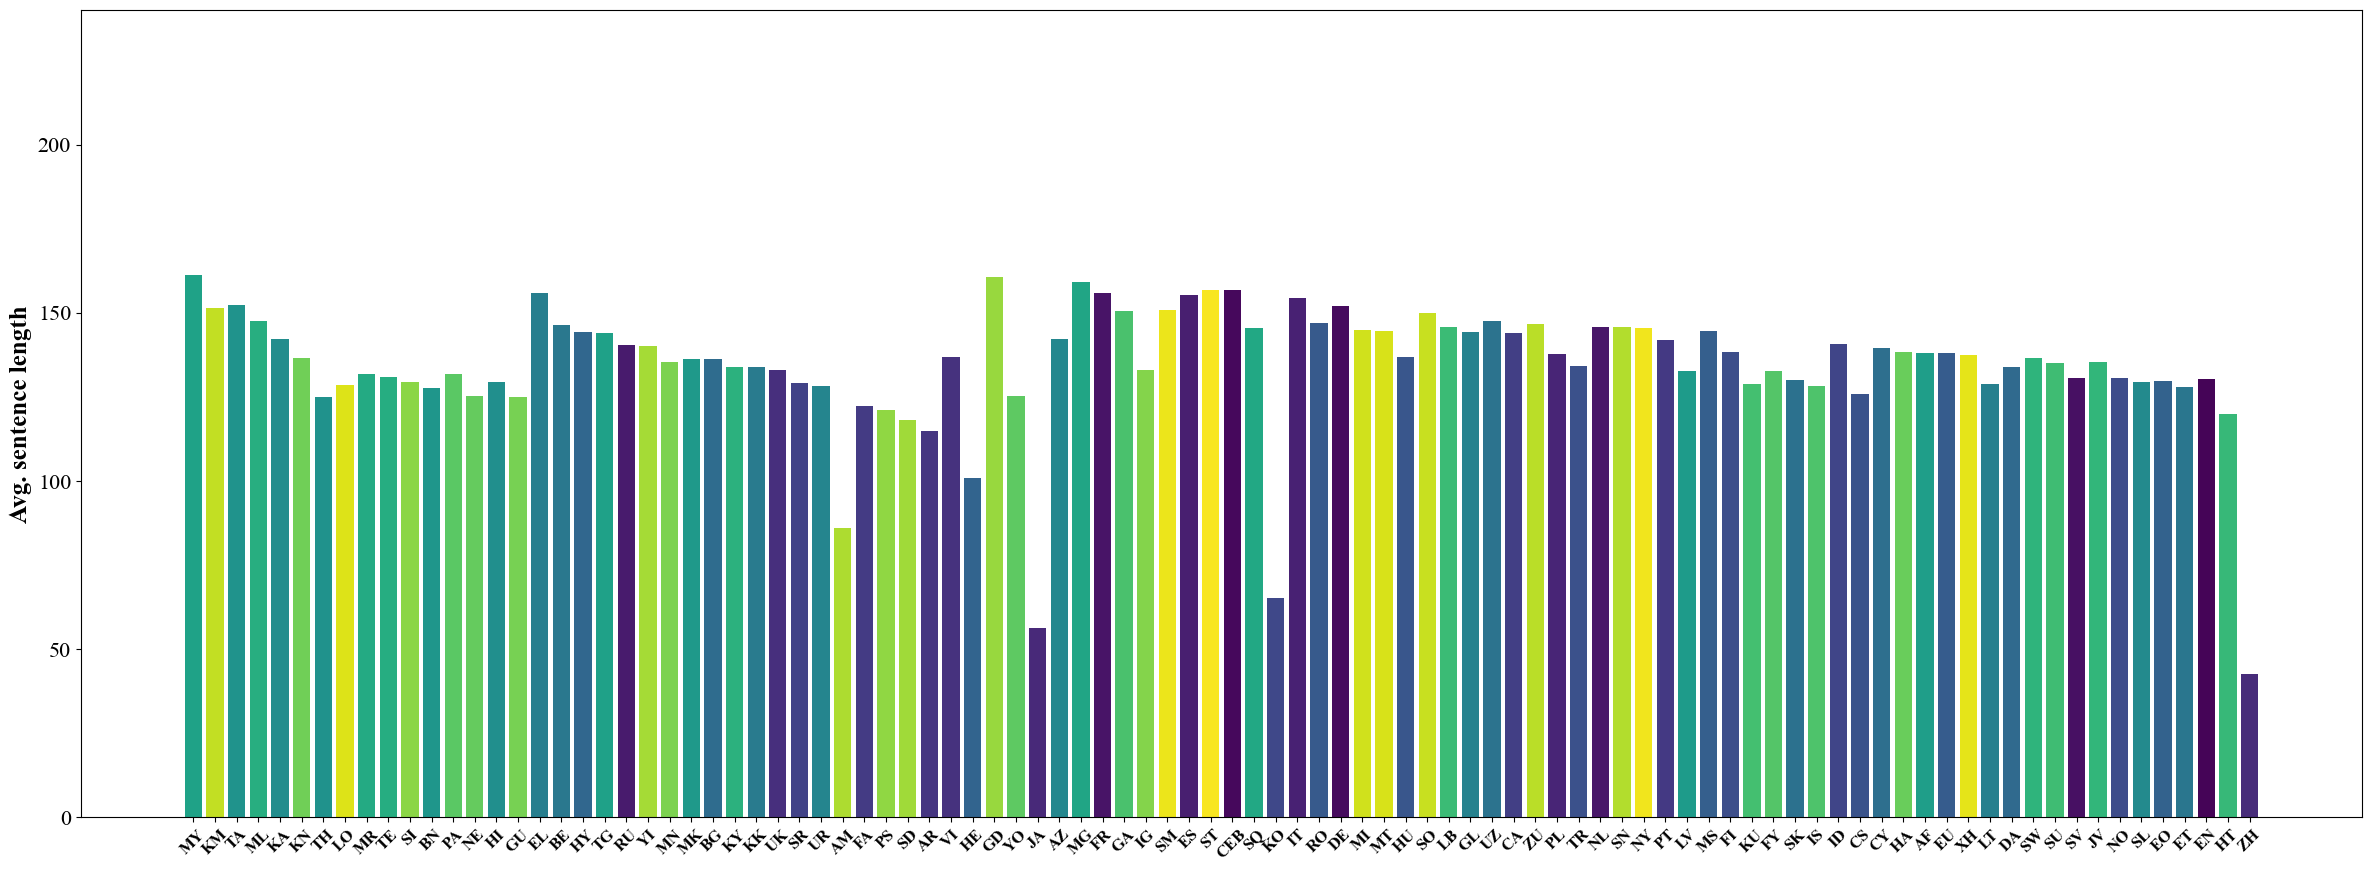

Log min diff: 108.89322756149619
Log mean diff: 1.3751756589638262


In [20]:
plot_token_numbers(flores_chars, "characters", 240., language_ordering=language_ordering)
compute_log_diff(flores_chars)

<Figure size 1200x700 with 0 Axes>

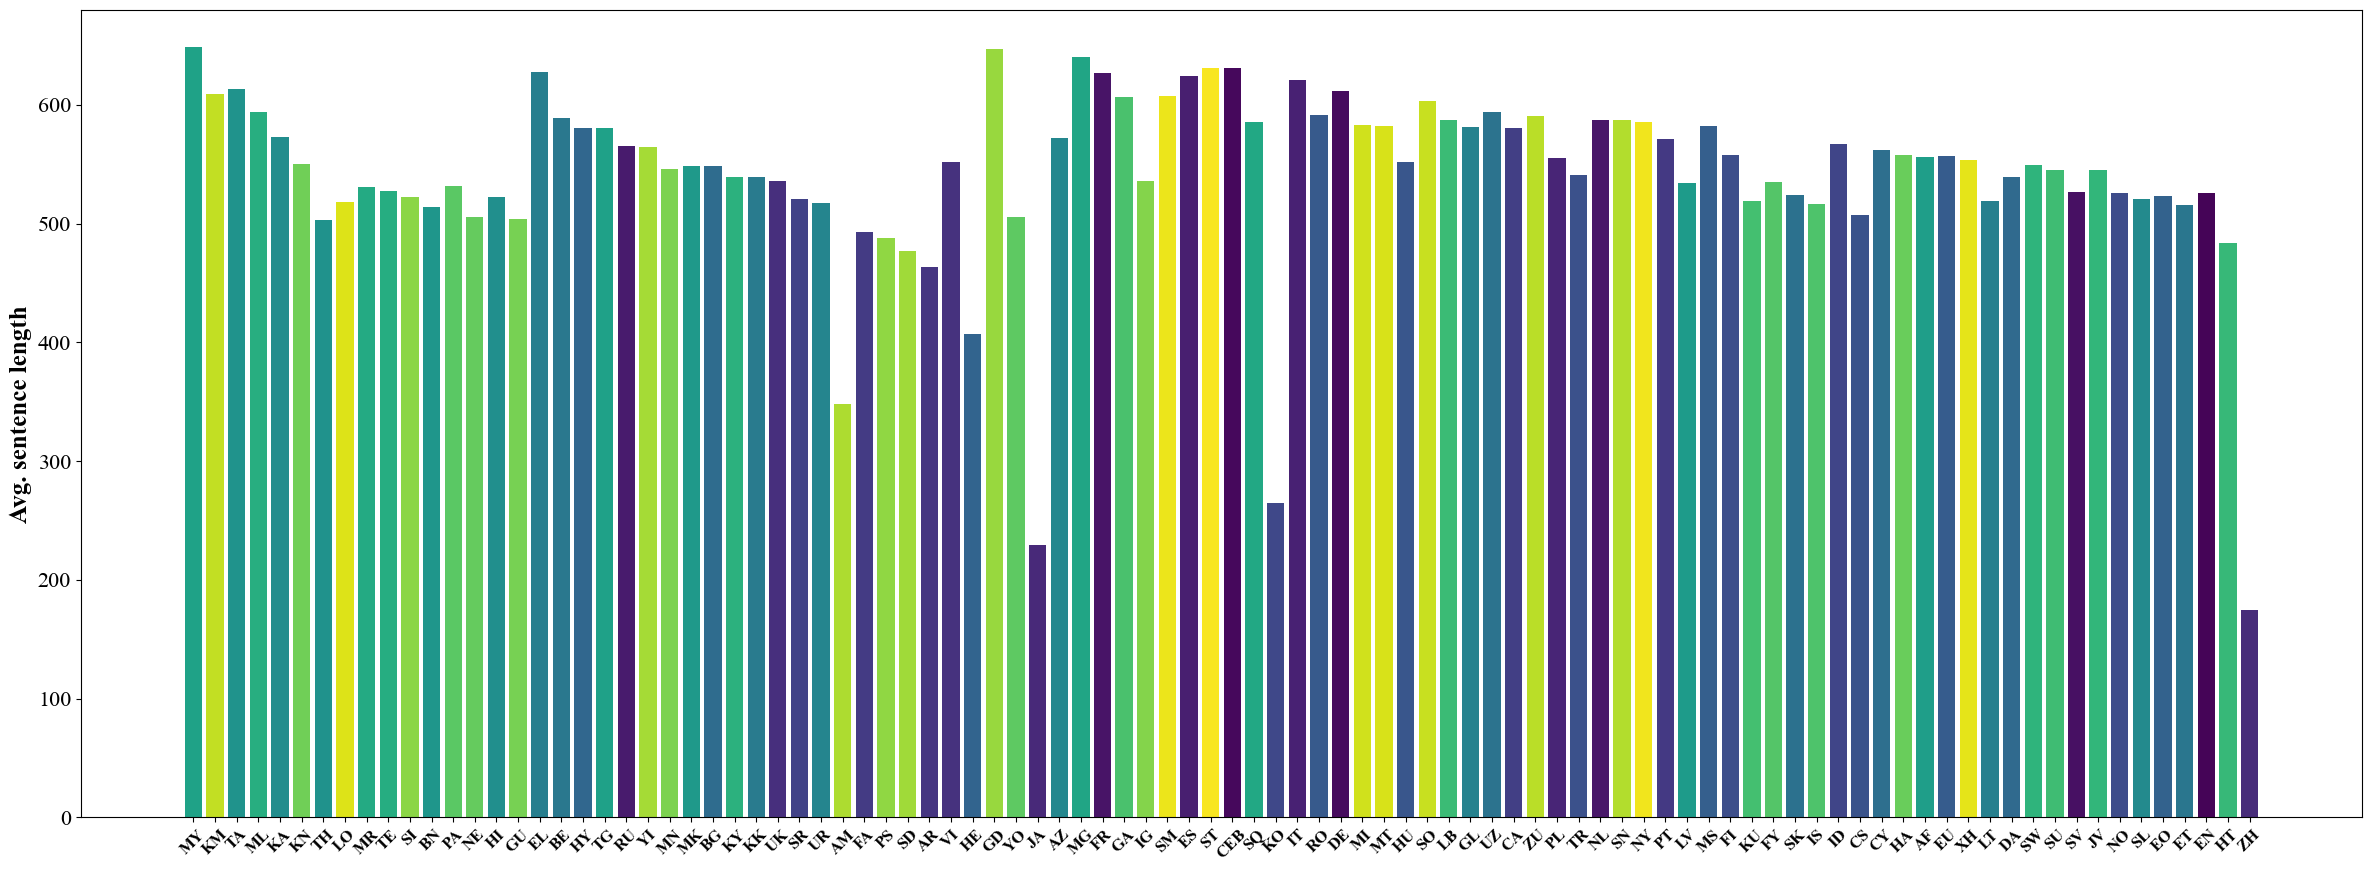

Log min diff: 107.40930472034756
Log mean diff: 1.3483255675787404


In [21]:
plot_token_numbers(flores_utf32, "bytes_utf32", 680., language_ordering=language_ordering)
compute_log_diff(flores_utf32)

<Figure size 1200x700 with 0 Axes>

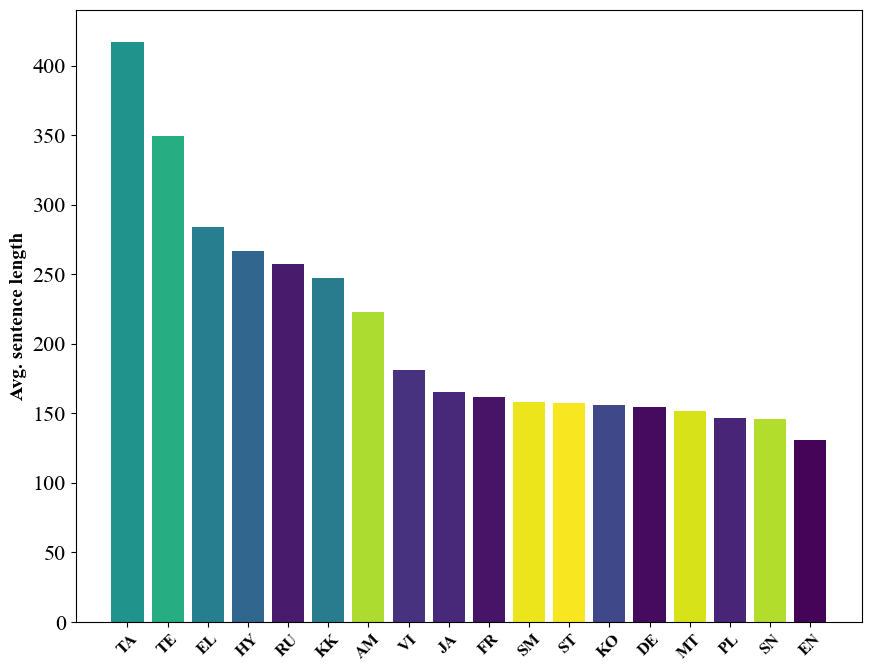

Log min diff: 44.13325594592493
Log mean diff: 7.000248016709463


In [22]:
plot_token_numbers(flores_bytes, "bytes_utf8_sample", 440., language_ordering=language_ordering_sample)
compute_log_diff(flores_bytes)

In [57]:
print(language_ordering_sample)

['ta', 'te', 'el', 'hy', 'ru', 'kk', 'am', 'vi', 'ja', 'fr', 'sm', 'st', 'ko', 'de', 'mt', 'pl', 'sn', 'en']


<Figure size 1200x700 with 0 Axes>

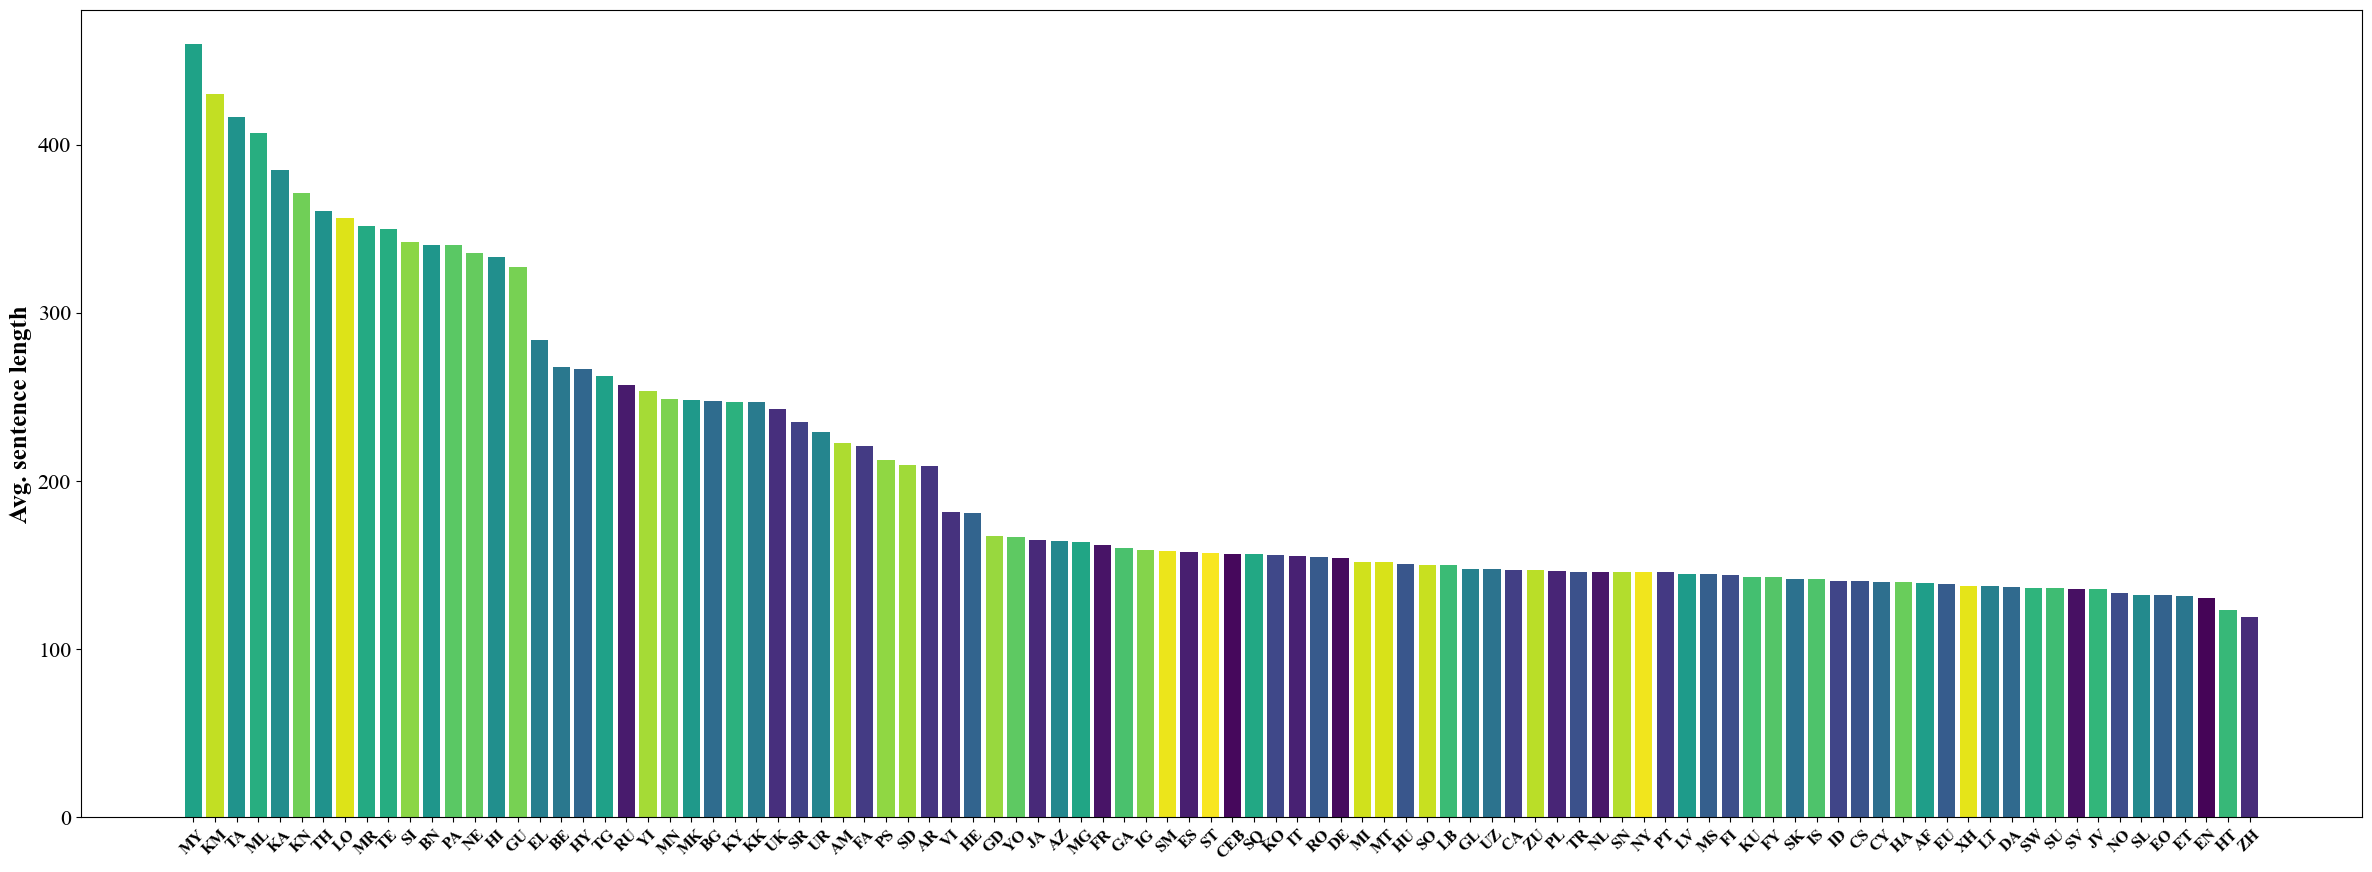

Log min diff: 44.13325594592493
Log mean diff: 7.000248016709463


In [24]:
plot_token_numbers(flores_bytes, "bytes_utf8", 480., language_ordering=language_ordering)
compute_log_diff(flores_bytes)

<Figure size 1200x700 with 0 Axes>

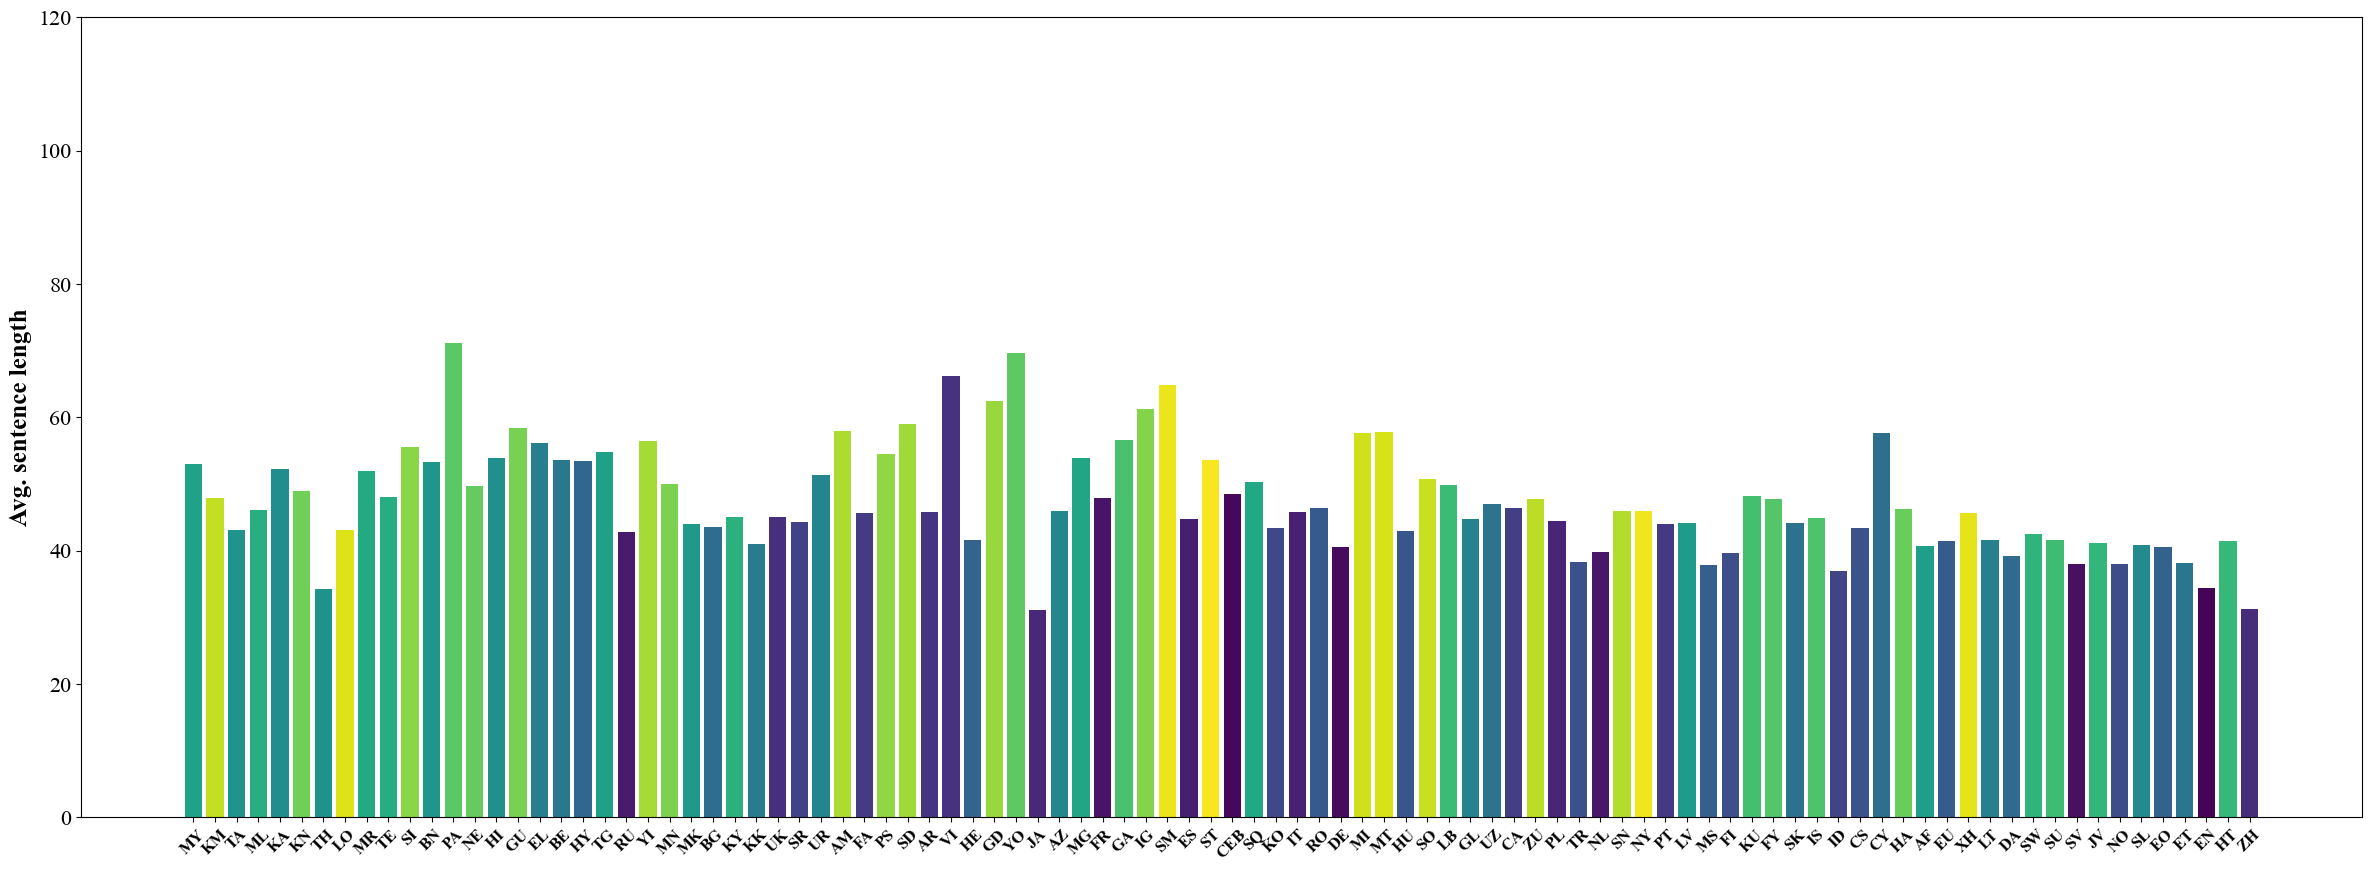

Log min diff: 39.27005164538633
Log mean diff: 1.2628181215837344


In [25]:
plot_token_numbers(flores_mt5, "subword_tokens", 120., language_ordering=language_ordering)
compute_log_diff(flores_mt5)

## Morfessor rewriting

In [26]:
from src.rewrite_bytes import ByteRewriter
from src.utils import str_to_hex

In [27]:
decompose_file = "byte_maps/decompose.json"
decompose_lc_file = "byte_maps/decompose_lc.json"
morf_all_map_file = "byte_maps/morf_map_all_cost_clustered.json"
morf_unigram_map_file = "byte_maps/morf_map_unigram_clustered.json"
morf_all_lc_map_file = "byte_maps/morf_map_all_lc_cost_clustered.json"

decompose_rewriter = ByteRewriter(decompose_file)
decompose_lc_rewriter = ByteRewriter(decompose_lc_file)
morf_all_rewriter = ByteRewriter(morf_all_map_file)
morf_unigram_rewriter = ByteRewriter(morf_unigram_map_file)
morf_all_lc_rewriter = ByteRewriter(morf_all_map_file)

flores_decomposed_rw = {lang: [decompose_rewriter.rewrite_bytes(str_to_hex(line).split(' ')) for line in flores[lang]] for lang in flores.keys()}
flores_morfs_all_rw = {lang: [morf_all_rewriter.rewrite_bytes(decompose_rewriter.rewrite_bytes(str_to_hex(line).split(' '))) for line in flores[lang]] for lang in flores.keys()}
flores_unigram_rw = {lang: [morf_unigram_rewriter.rewrite_bytes(decompose_rewriter.rewrite_bytes(str_to_hex(line).split(' '))) for line in flores[lang]] for lang in flores.keys()}
flores_morfs_all_lc_rw = {lang: [morf_all_lc_rewriter.rewrite_bytes(decompose_lc_rewriter.rewrite_bytes(str_to_hex(line).split(' '))) for line in flores[lang]] for lang in flores.keys()}

<Figure size 1200x700 with 0 Axes>

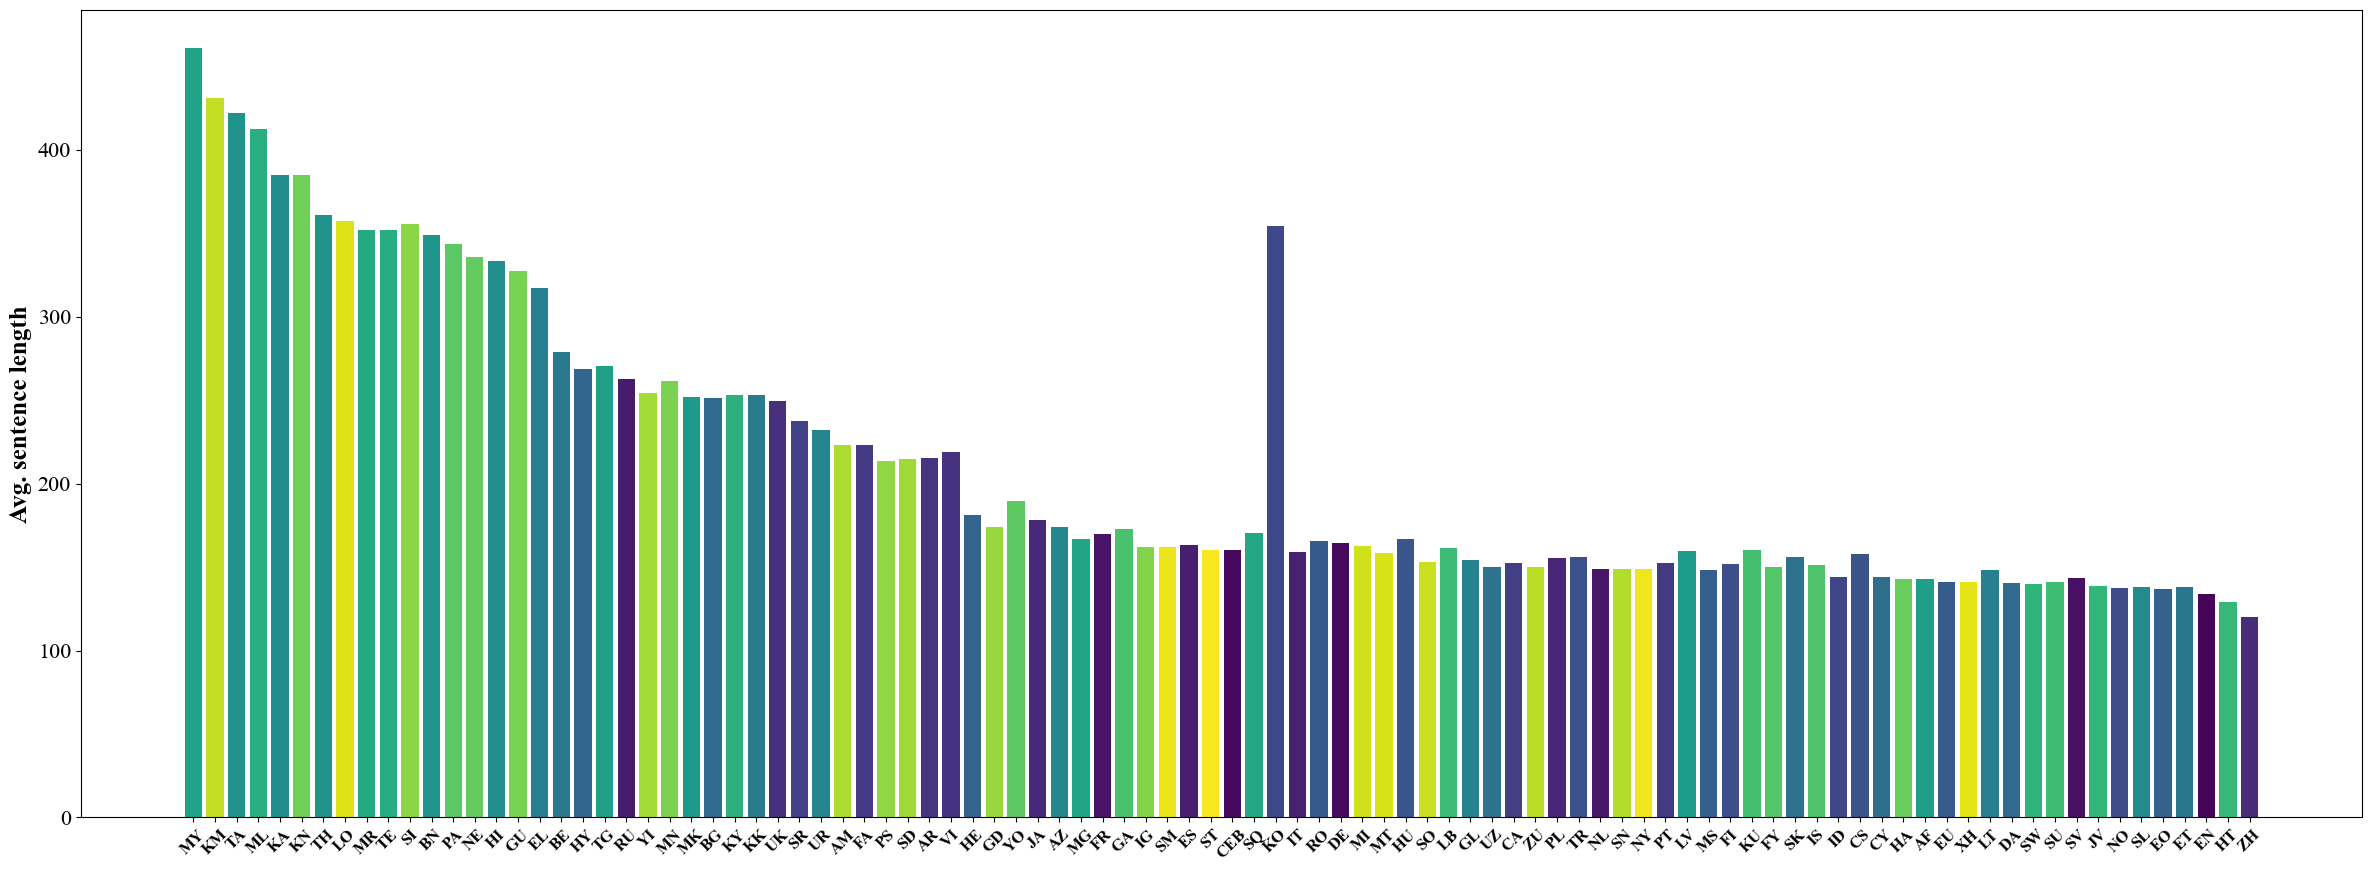

Log min diff: 48.046692496588776
Log mean diff: 6.668244955729392


In [28]:
title = f"Morfs rewritten in UTF-8 decompose"
plot_token_numbers(flores_decomposed_rw , title, language_ordering=language_ordering)
compute_log_diff(flores_decomposed_rw)

<Figure size 1200x700 with 0 Axes>

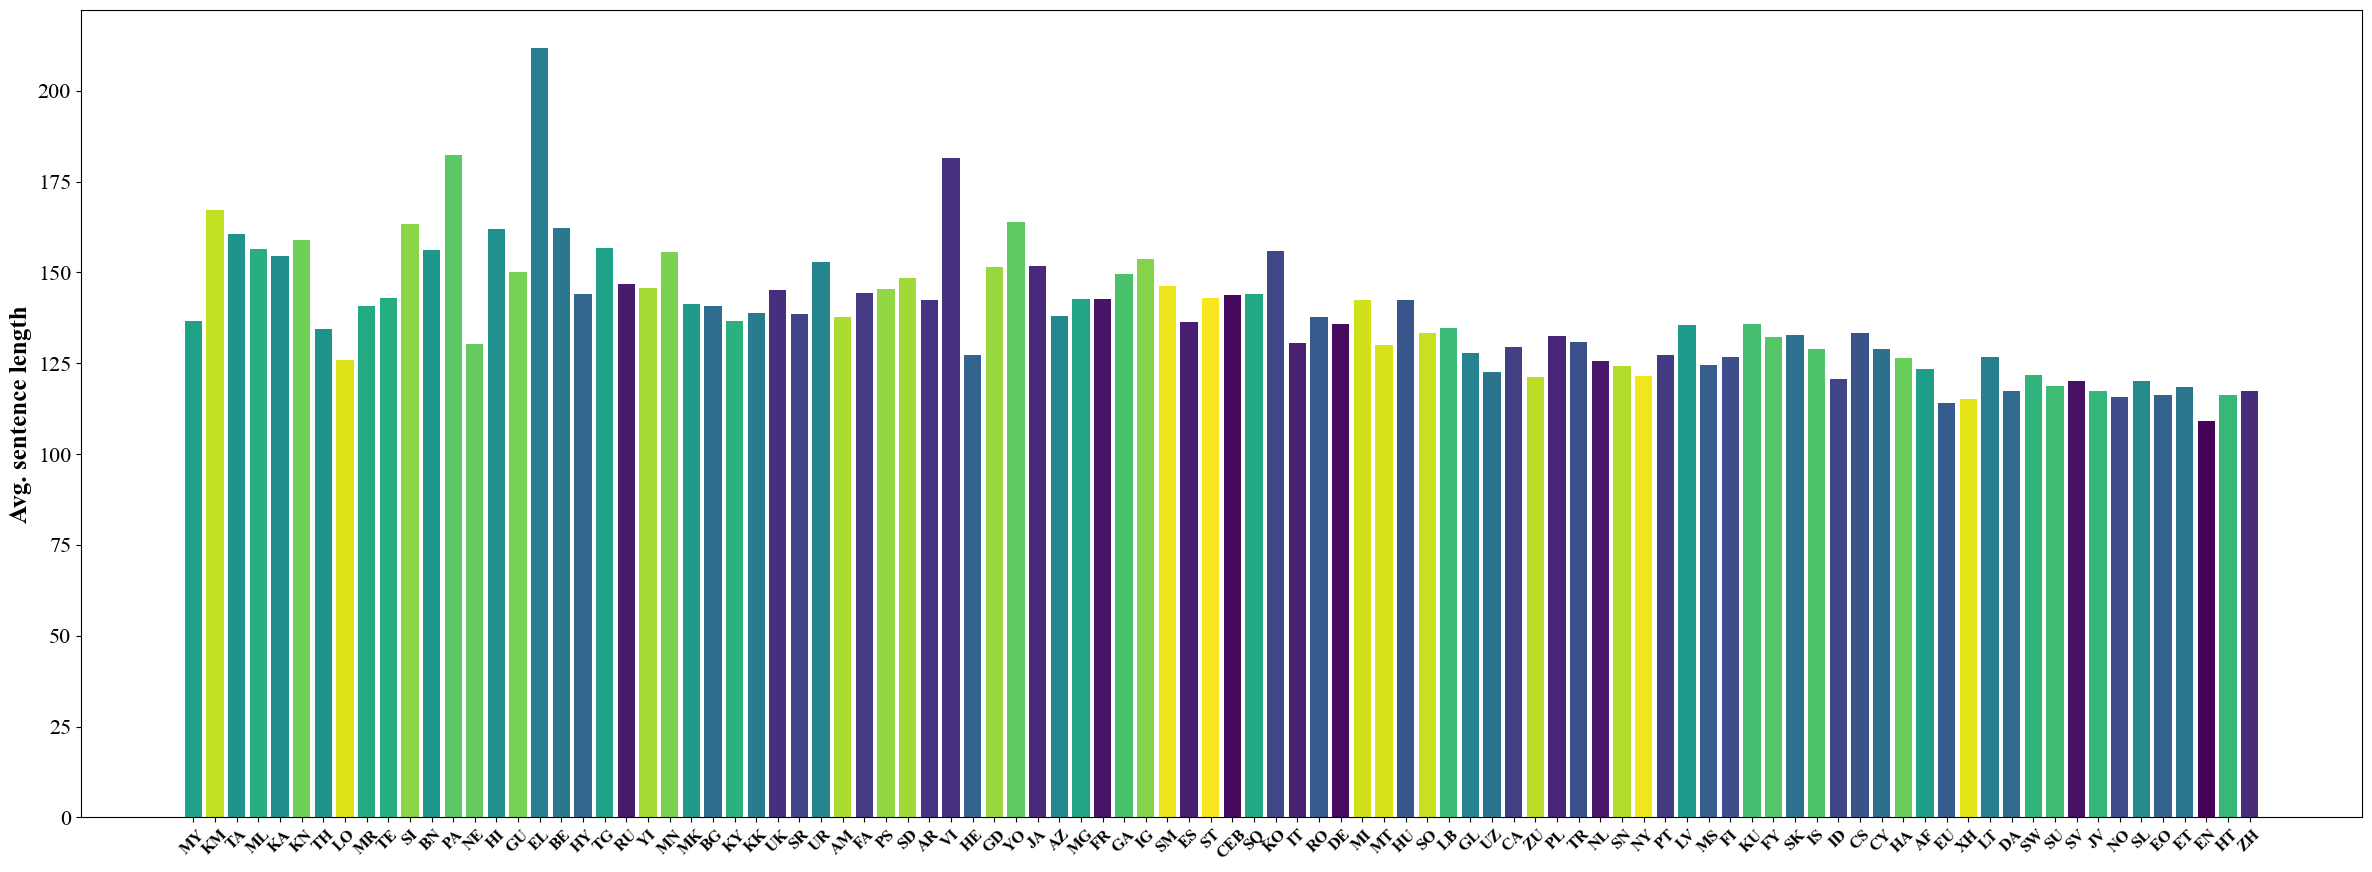

Log min diff: 22.181870324310808
Log mean diff: 0.6616125936030812


In [29]:
title = f"Morfs (all) not decomposed rewritten in UTF-8"
plot_token_numbers(flores_morfs_all_lc_rw , title, language_ordering=language_ordering)
compute_log_diff(flores_morfs_all_lc_rw)

<Figure size 1200x700 with 0 Axes>

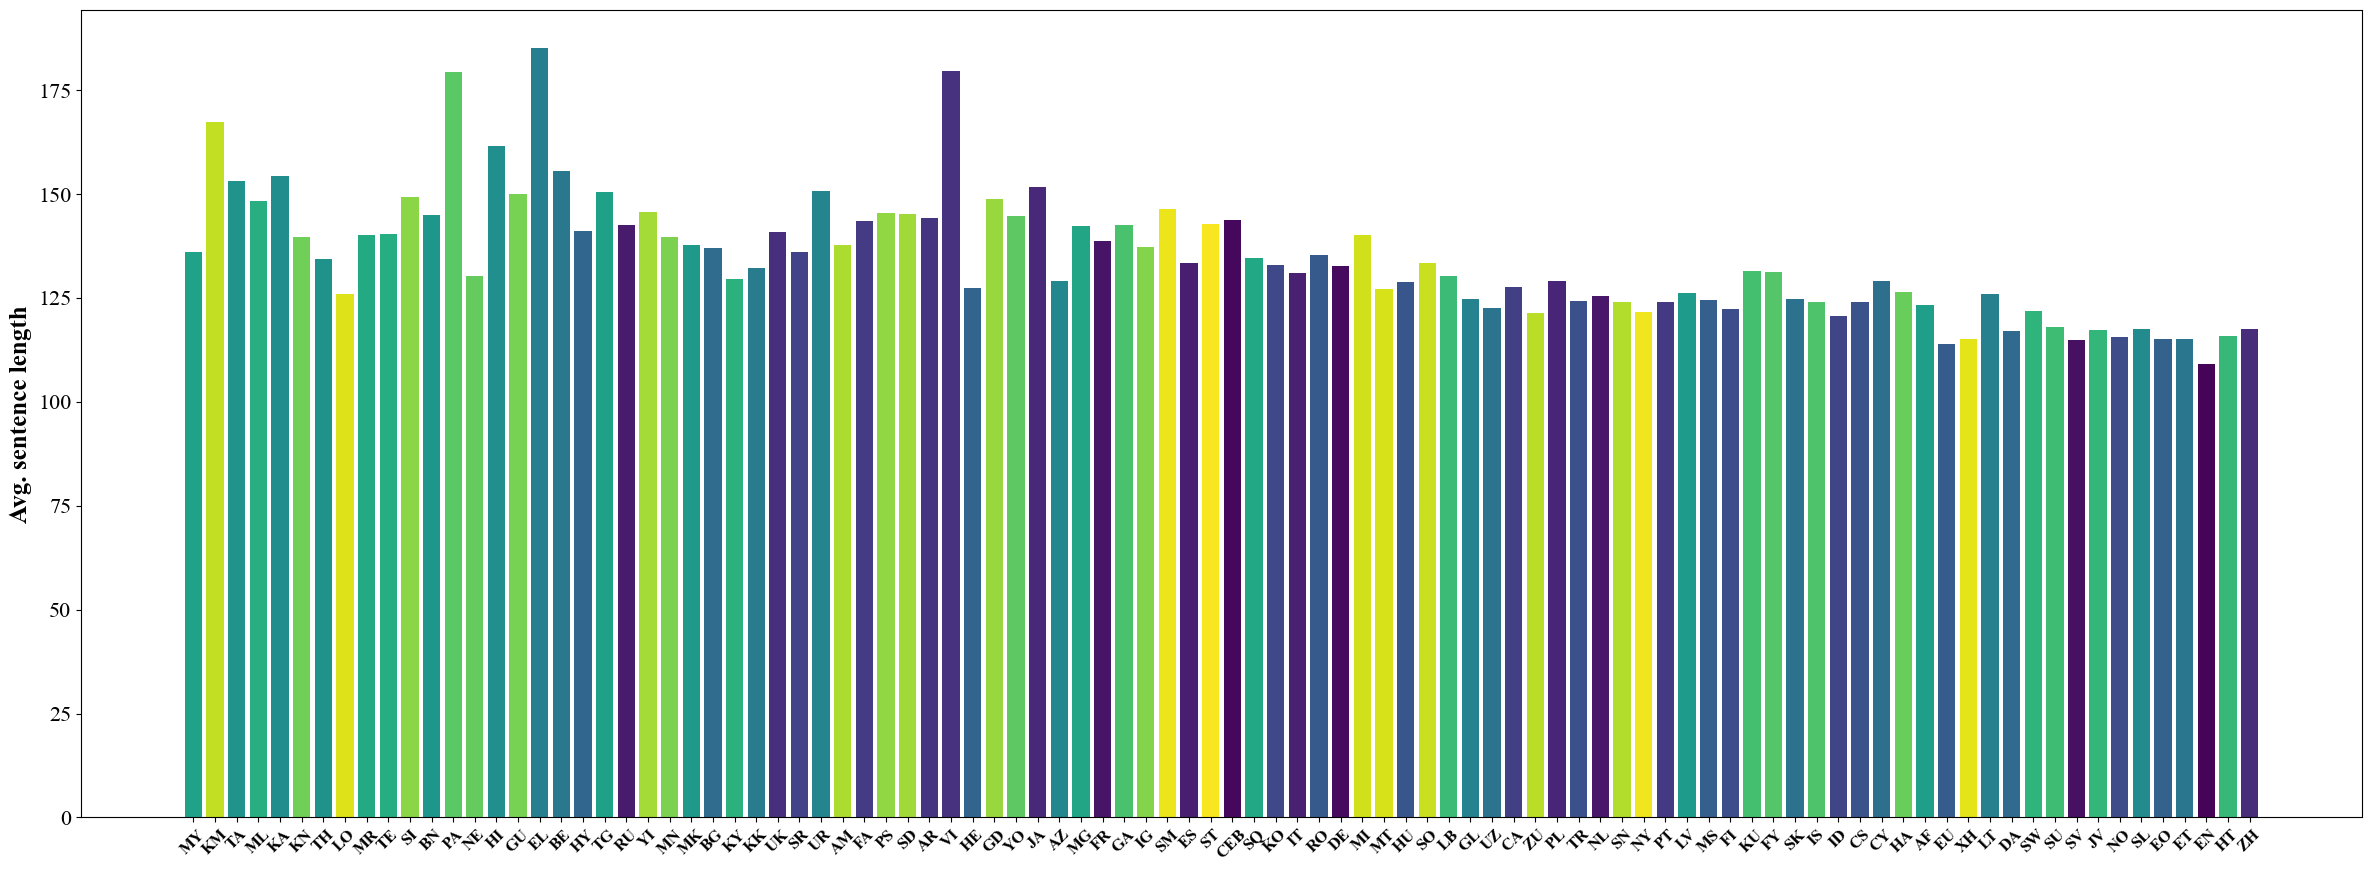

Log min diff: 19.682763598835948
Log mean diff: 0.5284102530173982


In [30]:
title = f"Morfs (all) rewritten in UTF-8"
plot_token_numbers(flores_morfs_all_rw , title, language_ordering=language_ordering)
compute_log_diff(flores_morfs_all_rw)

<Figure size 1200x700 with 0 Axes>

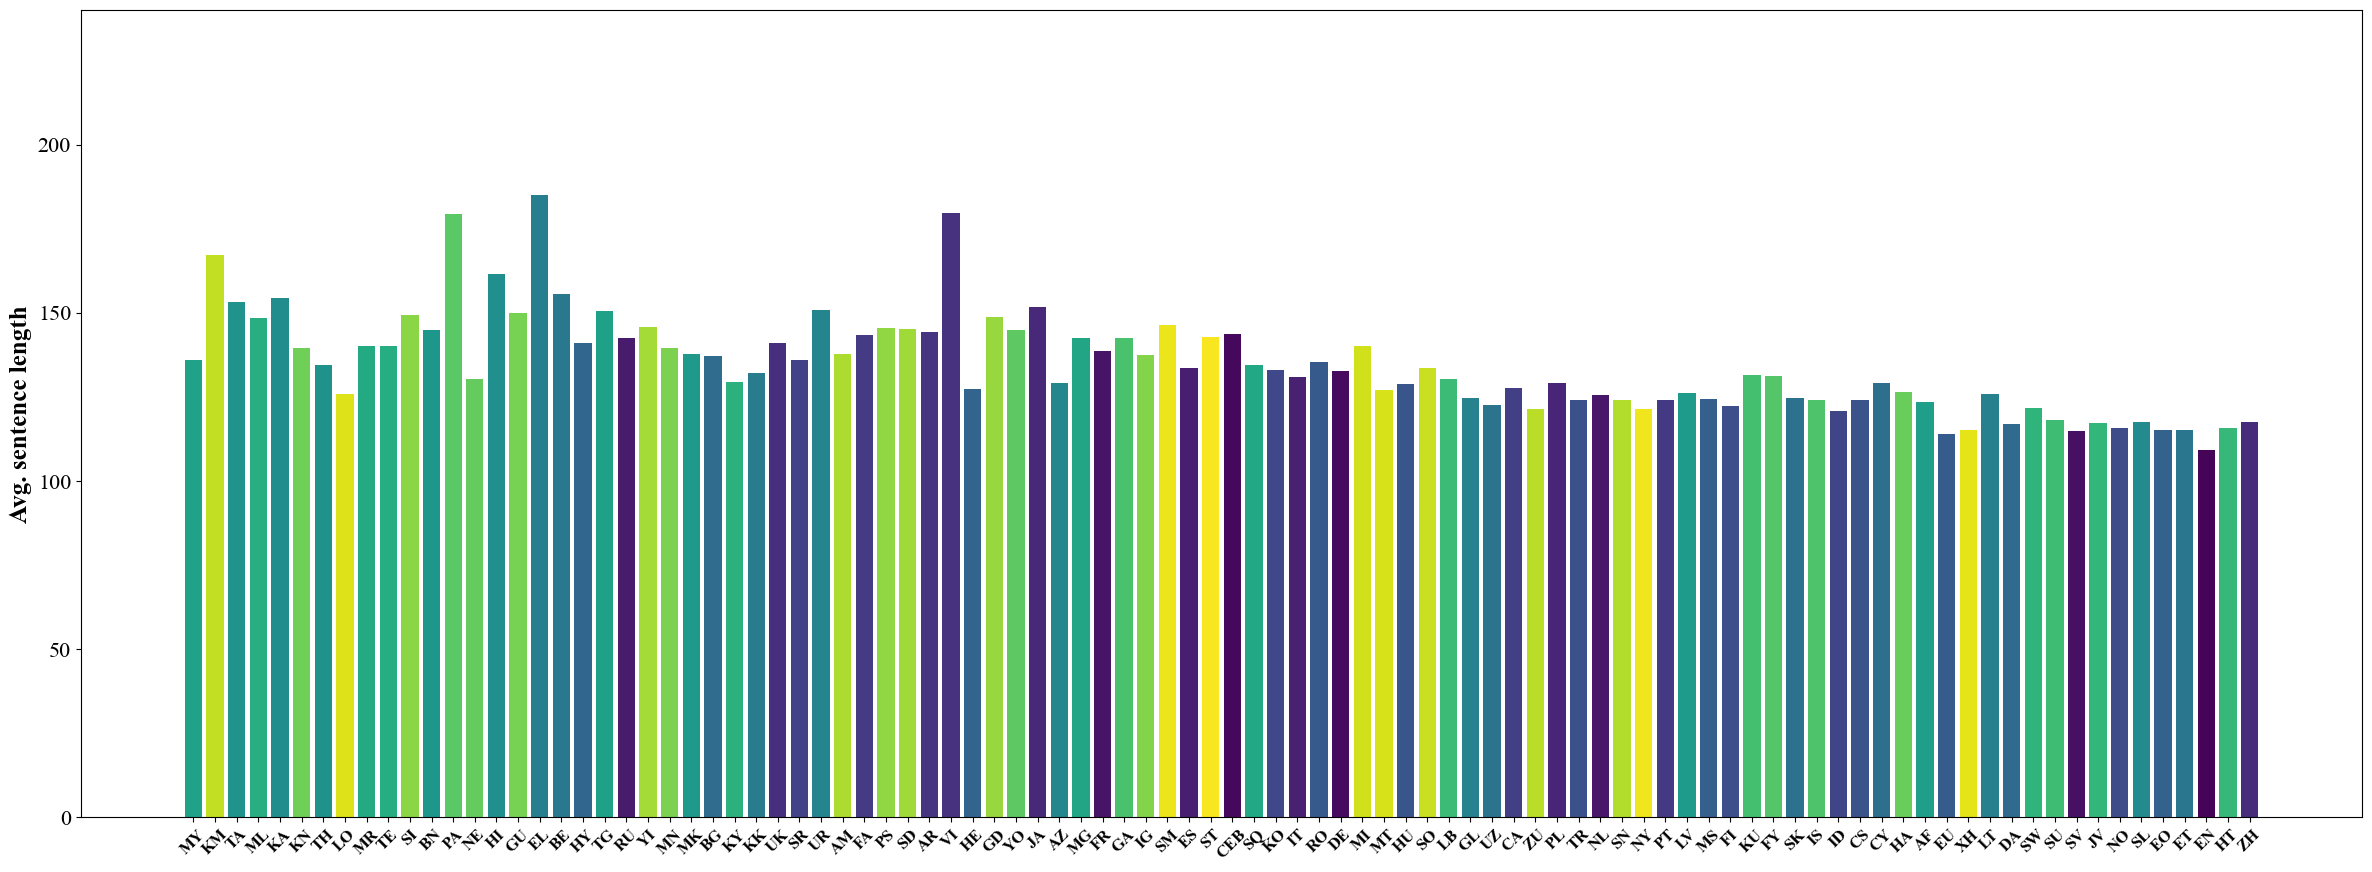

Log min diff: 19.682763598835948
Log mean diff: 0.5284102530173982


In [31]:
title = f"Morphs added to UTF-8"
plot_token_numbers(flores_morfs_all_rw , "mbytes", 240., language_ordering=language_ordering)
compute_log_diff(flores_morfs_all_rw)

<Figure size 1200x700 with 0 Axes>

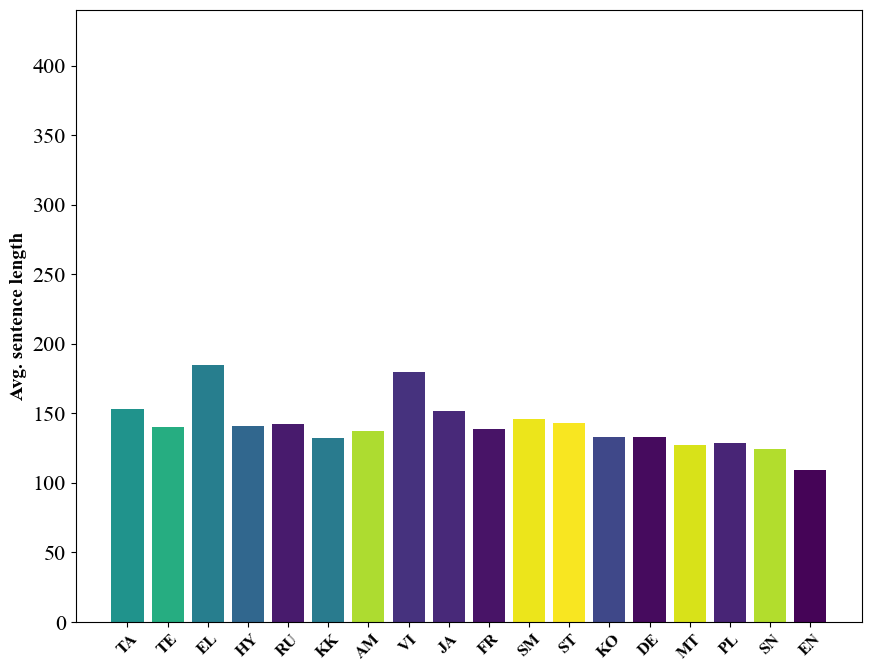

Log min diff: 19.682763598835948
Log mean diff: 0.5284102530173982


In [32]:
title = f"Morphs added to UTF-8"
plot_token_numbers(flores_morfs_all_rw , "mbytes_sample", 440., language_ordering=language_ordering_sample)
compute_log_diff(flores_morfs_all_rw)

<Figure size 1200x700 with 0 Axes>

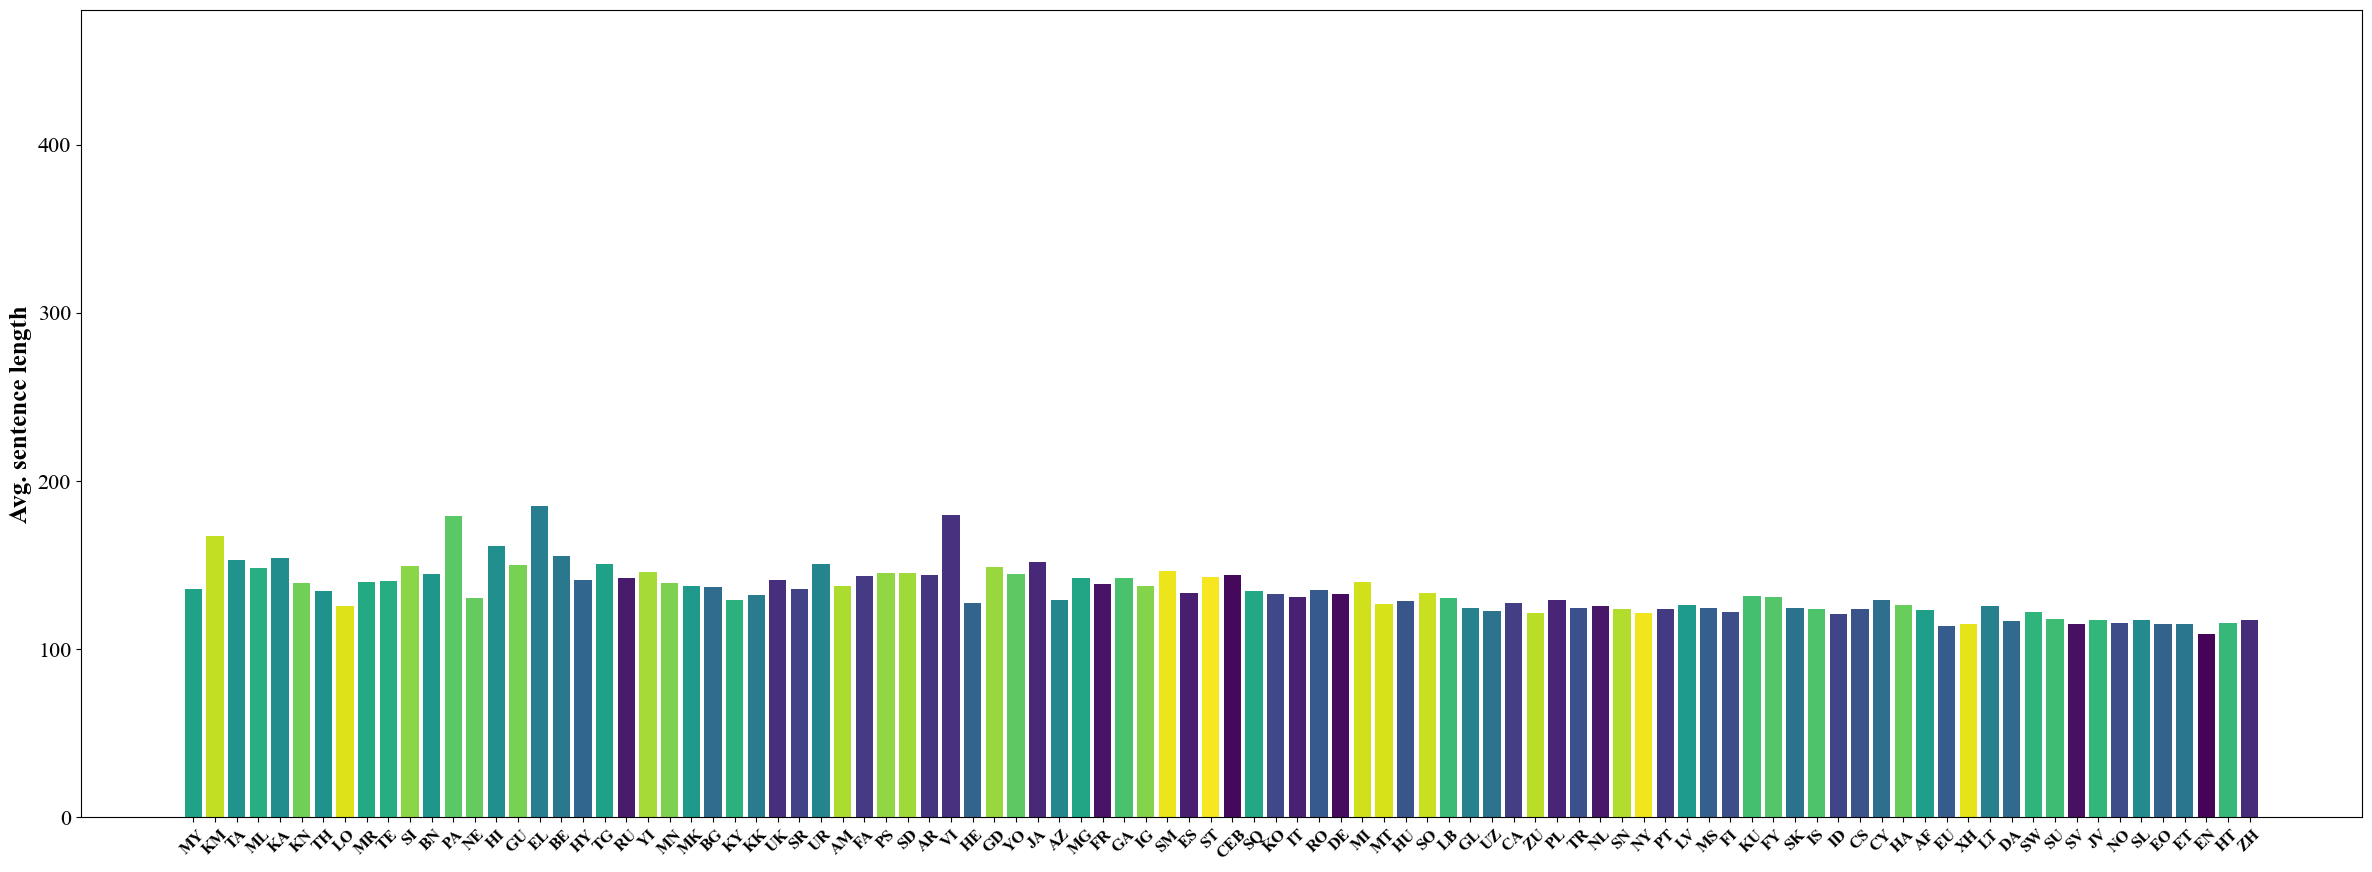

Log min diff: 19.682763598835948
Log mean diff: 0.5284102530173982


In [33]:
title = f"Unigram Subwords rewritten in UTF-8"
plot_token_numbers(flores_morfs_all_rw,"mbytes", 480.,language_ordering=language_ordering)
compute_log_diff(flores_morfs_all_rw)

<Figure size 1200x700 with 0 Axes>

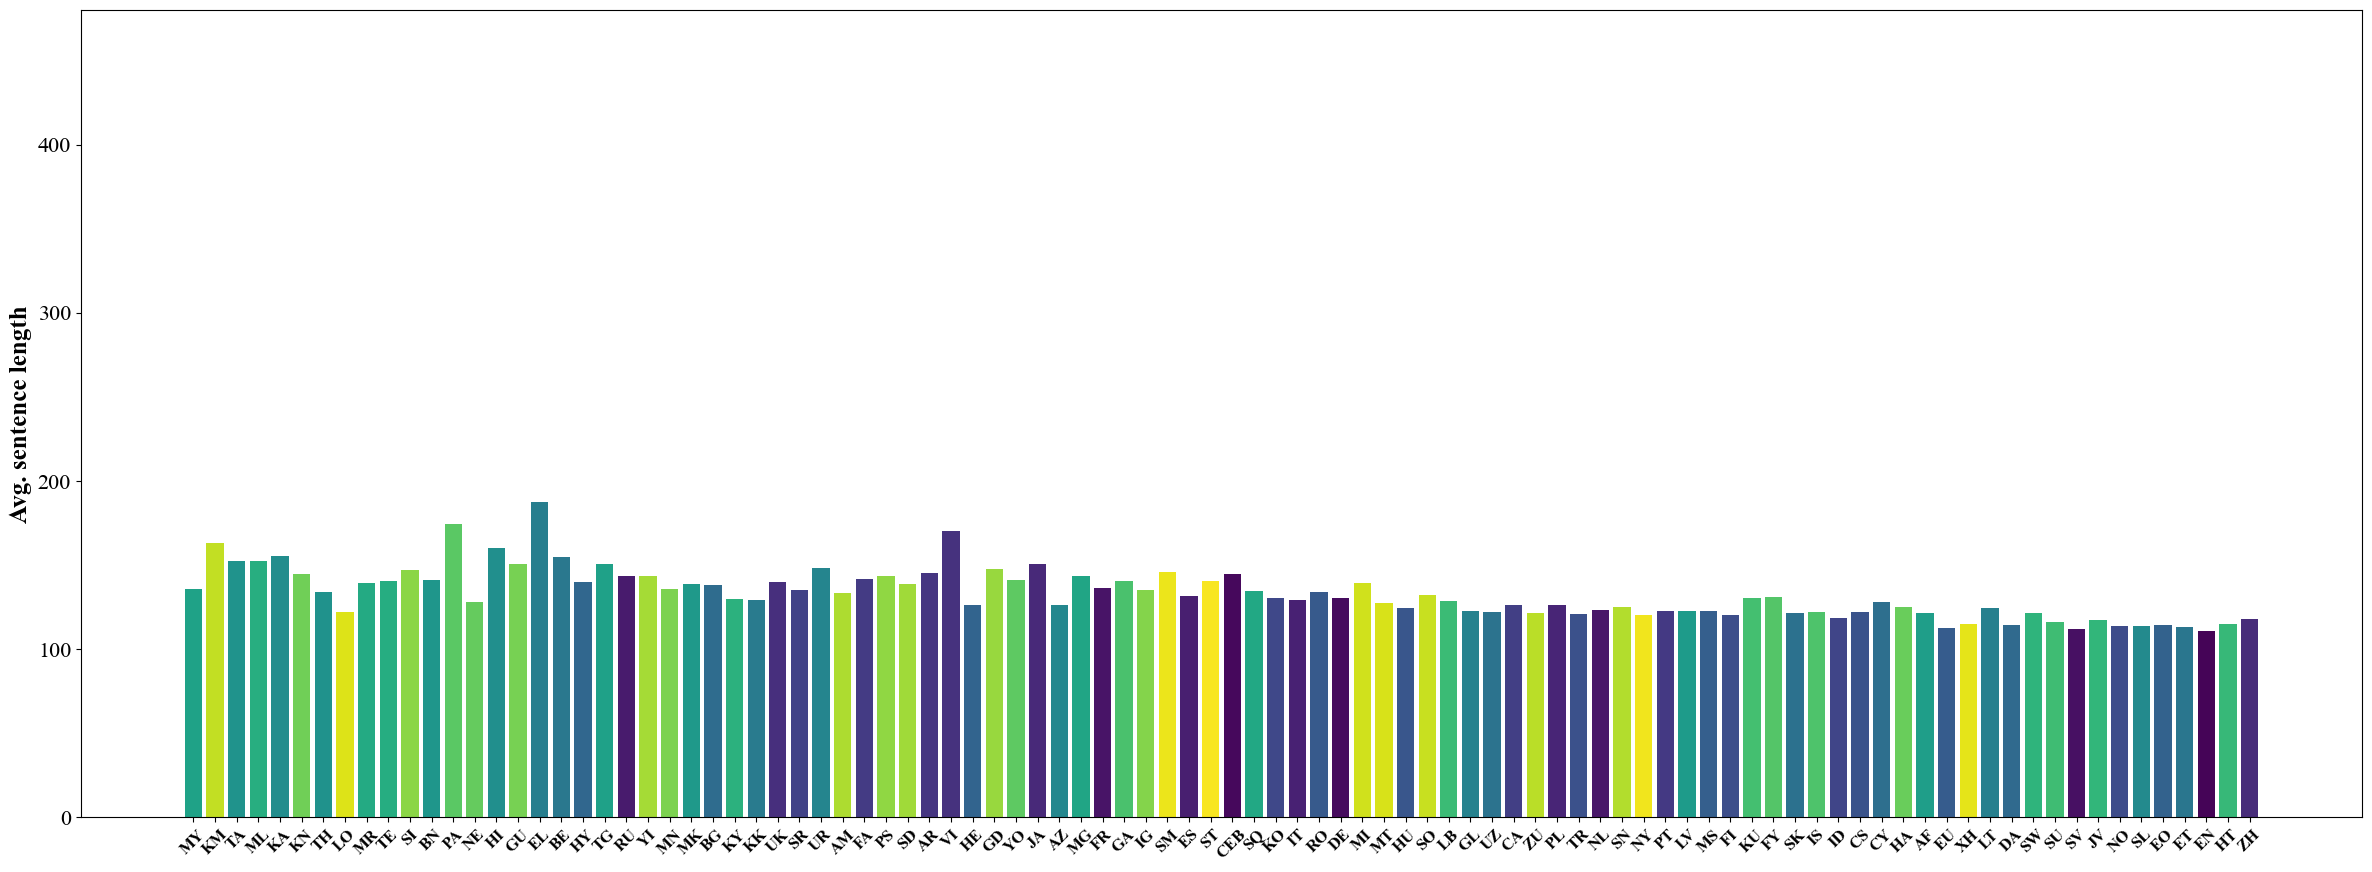

Log min diff: 17.365984740212696
Log mean diff: 0.5388799066873275


In [34]:
title = f"Unigram Subwords rewritten in UTF-8"
plot_token_numbers(flores_unigram_rw, "unigram_bytes", 480.,language_ordering=language_ordering)
compute_log_diff(flores_unigram_rw)

## Compare Parity

         Myte      Byte  Characters  Subword Tokens
en   1.000000  1.000000    1.000000        1.000000
ceb  1.317909  1.201694    1.200928        1.409275
de   1.216487  1.183669    1.164260        1.180186
sv   1.052377  1.040077    1.001557        1.105623
fr   1.269860  1.241718    1.193430        1.391317
..        ...       ...         ...             ...
lo   1.154015  2.730878    0.985885        1.254116
xh   1.054006  1.054127    1.053836        1.327098
sm   1.340471  1.211649    1.156251        1.884636
ny   1.113726  1.117013    1.114583        1.335144
st   1.309117  1.204049    1.201454        1.559837

[96 rows x 4 columns]
Means: Myte              1.234336
Byte              1.557836
Characters        1.033403
Subword Tokens    1.382155
dtype: float64
Std: Myte              0.133608
Byte              0.657365
Characters        0.143633
Subword Tokens    0.228809
dtype: float64


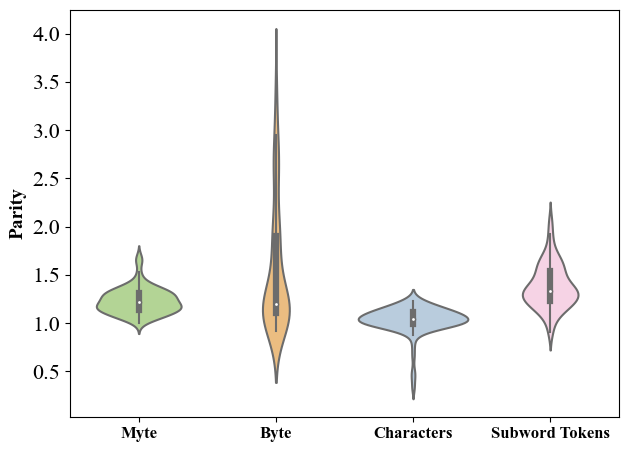

In [35]:

plot_compare_token_numbers([ flores_morfs_all_rw,flores_bytes, flores_utf32, flores_mt5],
                           ['Myte','Byte','Characters','Subword Tokens'], 
                           "parity_violin",
                           parity="en", violin=True)

           Myte        Byte  Characters  Subword Tokens
en   109.140316  130.529644  525.604743       34.390316
ceb  143.836957  156.856719  631.213439       48.465415
de   132.767787  154.503953  611.940711       40.586957
sv   114.856719  135.760870  526.422925       38.022727
fr   138.592885  162.081028  627.272727       47.847826
..          ...         ...         ...             ...
lo   125.949605  356.460474  518.185771       43.129447
xh   115.034585  137.594862  553.901186       45.639328
sm   146.299407  158.156126  607.731225       64.813241
ny   121.552372  145.803360  585.830040       45.916008
st   142.877470  157.164032  631.490119       53.643281

[96 rows x 4 columns]
Means: Myte              134.715806
Byte              203.343781
Characters        543.161602
Subword Tokens     47.532732
dtype: float64
Std: Myte              14.582030
Byte              85.805561
Characters        75.494407
Subword Tokens     7.868830
dtype: float64


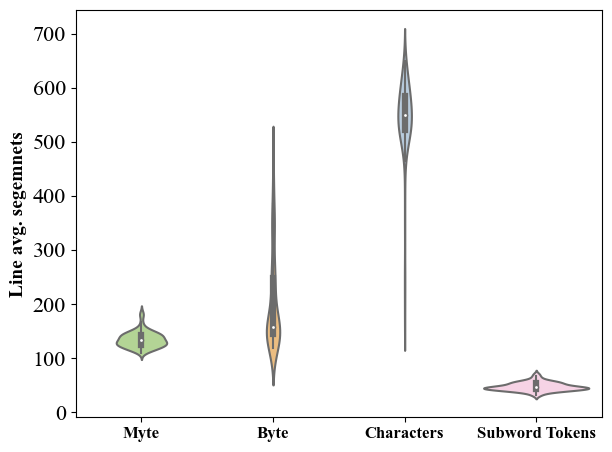

In [36]:
plot_compare_token_numbers([ flores_morfs_all_rw,flores_bytes, flores_utf32, flores_mt5],
                           ['Myte','Byte','Characters','Subword Tokens'], 
                           "lengths_violin",
                           violin=True)

         Myte      Byte  Characters  Subword Tokens
en   1.000000  1.000000    1.000000        1.000000
ceb  1.317909  1.201694    1.200928        1.409275
de   1.216487  1.183669    1.164260        1.180186
sv   1.052377  1.040077    1.001557        1.105623
fr   1.269860  1.241718    1.193430        1.391317
..        ...       ...         ...             ...
lo   1.154015  2.730878    0.985885        1.254116
xh   1.054006  1.054127    1.053836        1.327098
sm   1.340471  1.211649    1.156251        1.884636
ny   1.113726  1.117013    1.114583        1.335144
st   1.309117  1.204049    1.201454        1.559837

[96 rows x 4 columns]
Means: Myte              1.234336
Byte              1.557836
Characters        1.033403
Subword Tokens    1.382155
dtype: float64
Std: Myte              0.133608
Byte              0.657365
Characters        0.143633
Subword Tokens    0.228809
dtype: float64


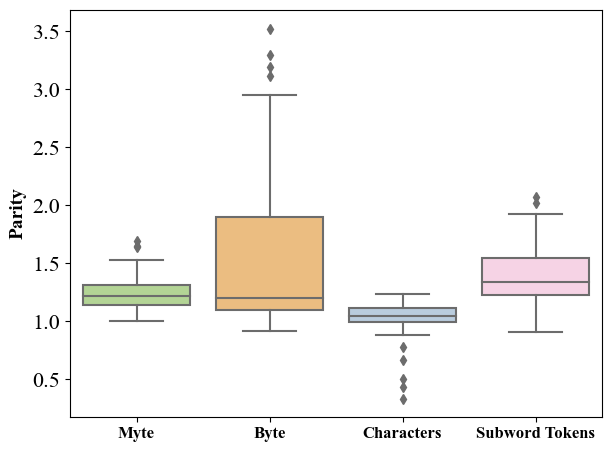

In [37]:
plot_compare_token_numbers([ flores_morfs_all_rw,flores_bytes, flores_utf32, flores_mt5],
                           ['Myte','Byte','Characters','Subword Tokens'], 
                           "parity_boxplot",
                           parity="en", violin=False)

           Myte        Byte  Characters  Subword Tokens
en   109.140316  130.529644  525.604743       34.390316
ceb  143.836957  156.856719  631.213439       48.465415
de   132.767787  154.503953  611.940711       40.586957
sv   114.856719  135.760870  526.422925       38.022727
fr   138.592885  162.081028  627.272727       47.847826
..          ...         ...         ...             ...
lo   125.949605  356.460474  518.185771       43.129447
xh   115.034585  137.594862  553.901186       45.639328
sm   146.299407  158.156126  607.731225       64.813241
ny   121.552372  145.803360  585.830040       45.916008
st   142.877470  157.164032  631.490119       53.643281

[96 rows x 4 columns]
Means: Myte              134.715806
Byte              203.343781
Characters        543.161602
Subword Tokens     47.532732
dtype: float64
Std: Myte              14.582030
Byte              85.805561
Characters        75.494407
Subword Tokens     7.868830
dtype: float64


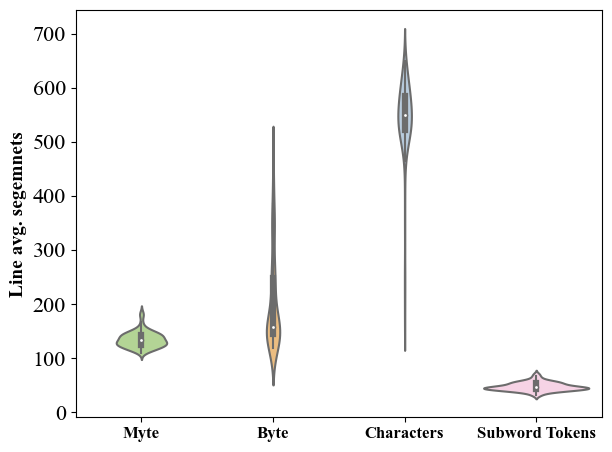

In [38]:
plot_compare_token_numbers([ flores_morfs_all_rw,flores_bytes, flores_utf32, flores_mt5],
                           ['Myte','Byte','Characters','Subword Tokens'], 
                           "lengths_boxplot",
                           violin=True)

## Sequence compression

In [39]:
def plot_compression_factors(flores_compressed, flores_bytes, save_file=None, language_ordering=None, languages=languages):
    languages = list(flores_compressed.keys()) 
    compression_factors = []
    for lang in languages:
        byte_base = sum([len(sen) for sen in flores_bytes[lang]])
        morph_base = sum([len(sen) for sen in flores_compressed[lang]])
        compression_factors.append(1- (morph_base/byte_base))

    if language_ordering is None:
        language_ordering, compression_factors = zip(*sorted(zip(languages, compression_factors), key=lambda x: x[1], reverse=True))
    else:
        compression_factors = [compression_factors[languages.index(lang)] for lang in language_ordering]

    # plot bar plot going down from 0 to 100 %

    # barplot with pall

    def percent_minus_formatter(x, pos):
        return f"-{x:.0f}%"

    cmap = plt.cm.get_cmap('YlGn')
    norm = BoundaryNorm([-0.1, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8], cmap.N)

    if len(language_ordering) < 20:
        plt.figure(figsize=(9, 7))
    else:
        plt.figure(figsize=(24, 9))

    l_upper = [l.upper() for l in language_ordering]
    plt.bar(l_upper, np.array(compression_factors) * 100, color=cmap(norm(compression_factors)))

    if len(language_ordering) < 20:
        plt.xticks([])
    # else:
    #     plt.xticks([l.upper() for l in language_ordering])
    ax = plt.gca()
    formatter = FuncFormatter(percent_minus_formatter)
    ax.yaxis.set_major_formatter(formatter)
    ax.tick_params('x', top=True, bottom=False, labeltop=True, labelbottom=False, rotation=45)
    ax.set_ylim([min(0., (np.array(compression_factors) * 100).min()),70.])
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    # add percent to y ticks


    ax.invert_yaxis()
    if save_file:
        plt.tight_layout()
        plt.savefig(f"output/{save_file}.png", dpi=300)

    print(compression_factors)
    plt.show()

    

[0.6323626023085991, 0.5986864982994591, 0.34860834263887874, 0.47025643878288925, 0.44622842261333173, 0.4652099482428984, 0.3821601241960524, 0.010124941450715075, 0.08183281570711332, 0.1449160498945289, 0.07496844814874981, 0.0909022320025149, 0.14726329064189259, 0.1406835595236573, 0.1632736659362667, 0.11934328479018974, 0.1490893574365192, 0.16386567344961245]


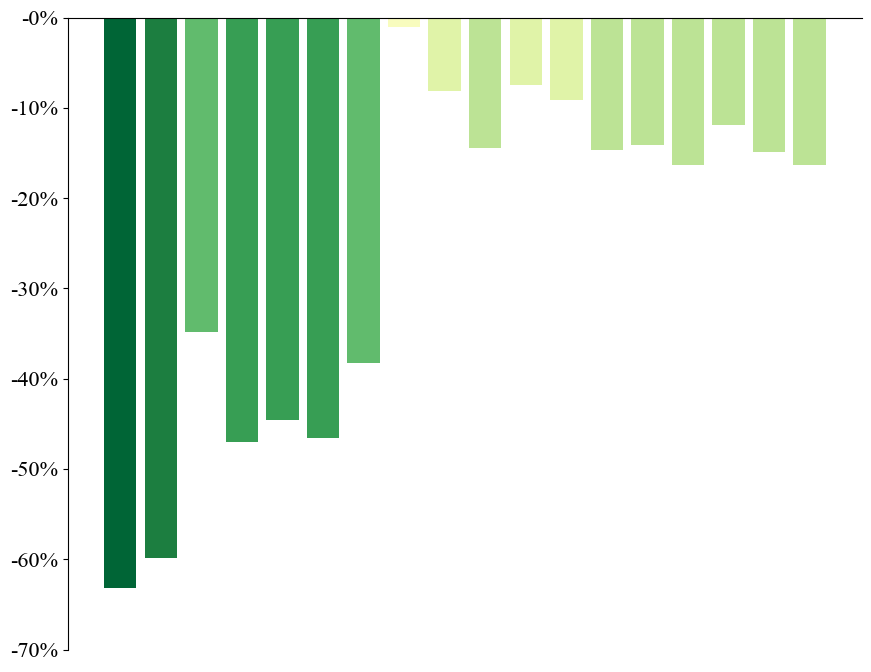

In [40]:
plot_compression_factors(flores_morfs_all_rw, flores_bytes,"compression_sample", language_ordering=language_ordering_sample)

[0.704138096956574, 0.6109724654266686, 0.6323626023085991, 0.6353809201147289, 0.5987966620720103, 0.6235858101629914, 0.6274930842759716, 0.6466660013638708, 0.6011070753868297, 0.5986864982994591, 0.5636284300806806, 0.574378702688275, 0.47283916181444163, 0.6115703209690342, 0.514719929752532, 0.5414597605325795, 0.34860834263887874, 0.4190366862420133, 0.47025643878288925, 0.42660600559658635, 0.44622842261333173, 0.426112181920838, 0.43923516738153145, 0.44526363980174766, 0.4464761752733658, 0.47623272506374437, 0.4652099482428984, 0.42011531174016636, 0.4218283879967395, 0.34118109114764283, 0.3821601241960524, 0.3506380199012098, 0.3151366496630301, 0.3066768610682411, 0.30915958272591304, 0.010124941450715075, 0.29634970313686293, 0.10986445026394664, 0.13207625387161914, 0.08183281570711332, 0.2159767575873992, 0.13032353065424285, 0.1449160498945289, 0.11118575954438437, 0.13665383182213386, 0.07496844814874981, 0.1554803898888979, 0.0909022320025149, 0.0830041766673596, 0.

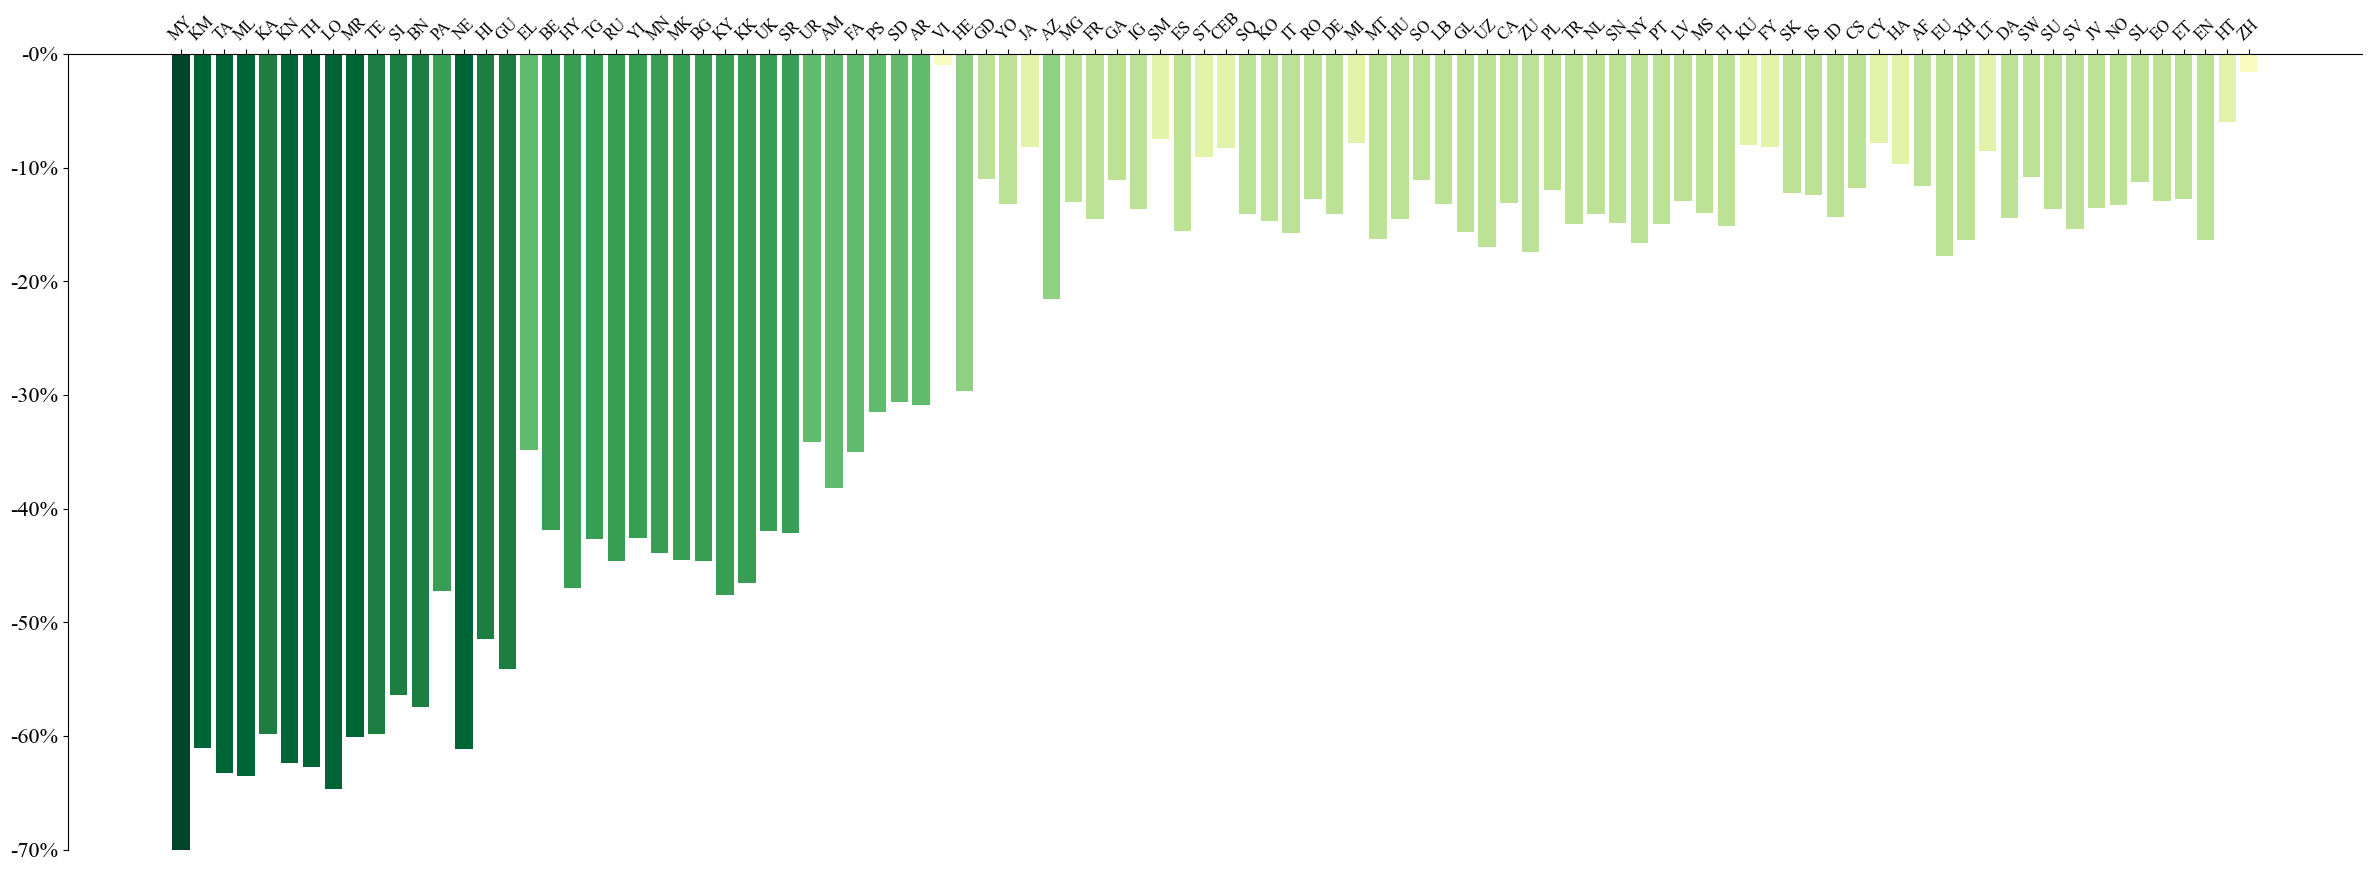

In [41]:
plot_compression_factors(flores_morfs_all_rw, flores_bytes,"compression", language_ordering=language_ordering)

## Generalization to unseen languages

In [42]:
# Set of five languages: Asturian , Sanscrit, Tunisian Arabic, Esperanto, Waray, Santali (Ol Chiki Script)
languages_unseen = ['ast',  'eo', 'war','aeb', 'sa', 'sal']

palette_unseen = sns.color_palette("inferno", len(languages_unseen))
languages_colors_unseen = {lang: col for lang, col in zip(languages_unseen, palette_unseen)}

languages_flores_unseen = {'ast': 'ast_Latn', 'eo': 'epo_Latn', 'war': 'war_Latn', 'aeb': 'aeb_Arab', 'sa': 'san_Deva', 'sal': 'sat_Olck'}

flores_unseen = {}
for lang in languages_unseen:
    with open(f'flores200_dataset/devtest/{languages_flores_unseen[lang]}.devtest', 'r') as f:
        flores_unseen[lang] = f.read().splitlines()


In [43]:
# Decomposing flores unseen

In [44]:
flores_unseen_utf32 = {lang: [bytes(line, 'utf-32') for line in flores_unseen[lang]] for lang in flores_unseen.keys()}
flores_unseen_bytes = {lang: [bytes(line, 'utf-8') for line in flores_unseen[lang]] for lang in flores_unseen.keys()}
flores_unseen_mt5 = {lang: [tokenizer.encode(line) for line in flores_unseen[lang]] for lang in flores_unseen.keys()}

flores_unseen_decomposed_rw = {lang: [decompose_rewriter.rewrite_bytes(str_to_hex(line).split(' ')) for line in flores_unseen[lang]] for lang in flores_unseen.keys()}
flores_unseen_morfs_all_rw = {lang: [morf_all_rewriter.rewrite_bytes(decompose_rewriter.rewrite_bytes(str_to_hex(line).split(' '))) for line in flores_unseen[lang]] for lang in flores_unseen.keys()}  

In [45]:
languages_unseen_ordering = get_language_ordering(flores_unseen_bytes)

<Figure size 1200x700 with 0 Axes>

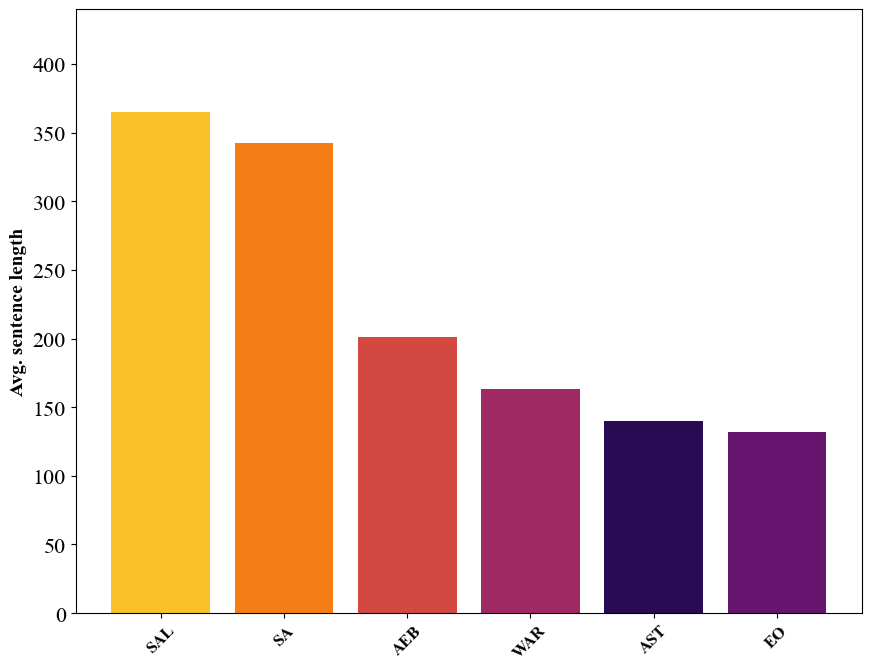

Log min diff: 2.653419952321528
Log mean diff: 0.5105625100264035


In [46]:
plot_token_numbers(flores_unseen_bytes, "bytes_utf8_unseen", 440., language_ordering=languages_unseen_ordering, languages_colors=languages_colors_unseen)
compute_log_diff(flores_unseen_bytes)

<Figure size 1200x700 with 0 Axes>

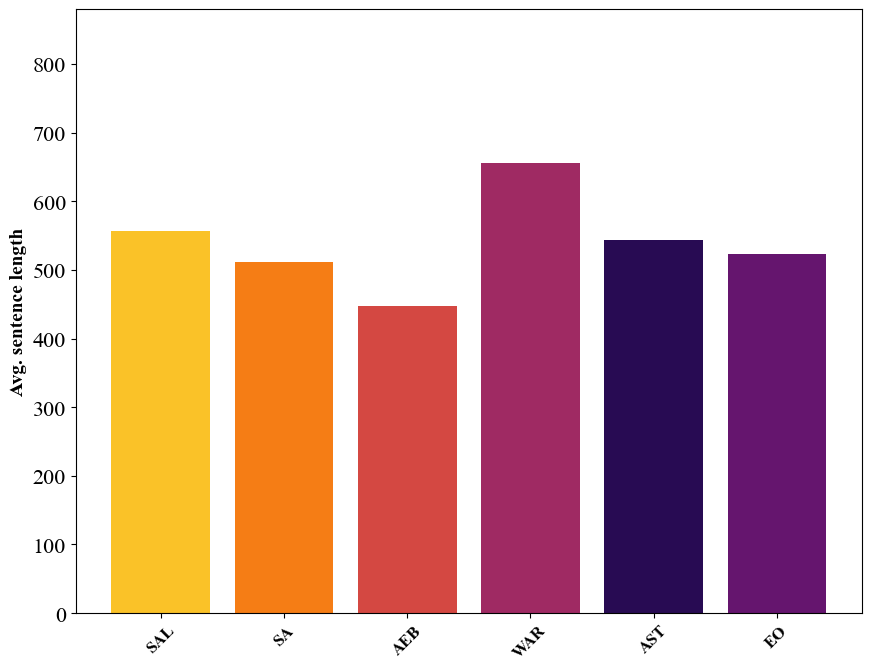

Log min diff: 1.088792502223086
Log mean diff: 0.039181144062219175


In [47]:
plot_token_numbers(flores_unseen_utf32, "bytes_utf32_unseen", 880., language_ordering=languages_unseen_ordering, languages_colors=languages_colors_unseen)
compute_log_diff(flores_unseen_utf32)

<Figure size 1200x700 with 0 Axes>

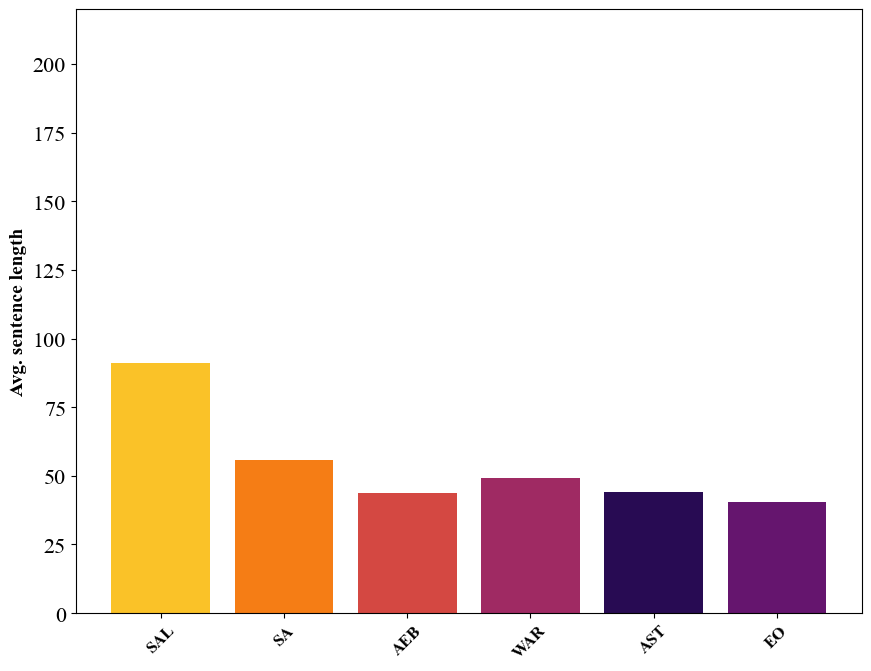

Log min diff: 1.4762244928021708
Log mean diff: 0.2438051587215


In [48]:
plot_token_numbers(flores_unseen_mt5, "subword_tokens_unseen", 220., language_ordering=languages_unseen_ordering, languages_colors=languages_colors_unseen)
compute_log_diff(flores_unseen_mt5)

<Figure size 1200x700 with 0 Axes>

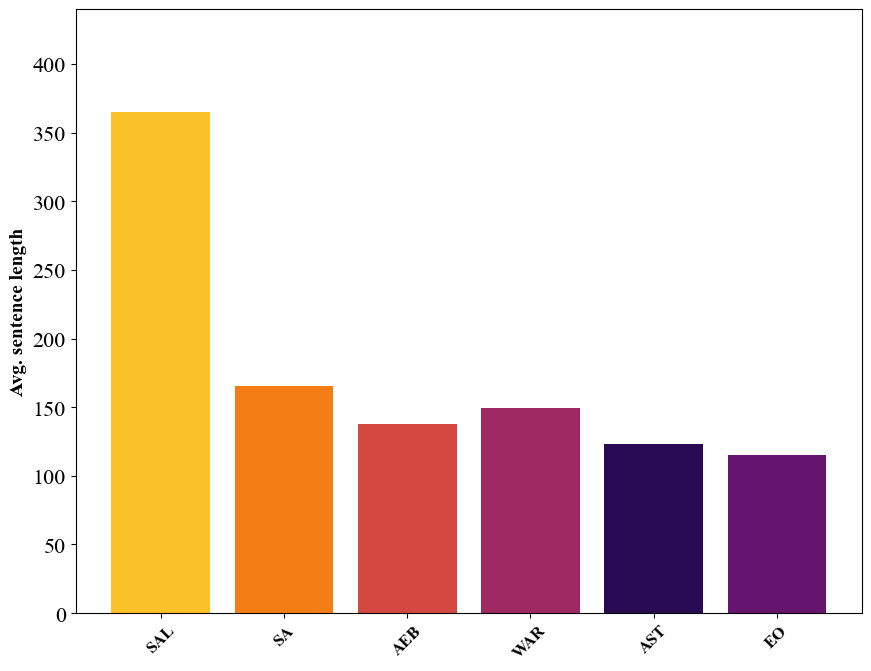

Log min diff: 2.0309166479751504
Log mean diff: 0.5221009648469099


In [49]:
plot_token_numbers(flores_unseen_morfs_all_rw, "mbytes_unseen", 440., language_ordering=languages_unseen_ordering, languages_colors=languages_colors_unseen)
compute_log_diff(flores_unseen_morfs_all_rw)


[-0.00042511135480549633, 0.5167116462528545, 0.31481026588323147, 0.08151603569283783, 0.11817789627785602, 0.1294357793363341]


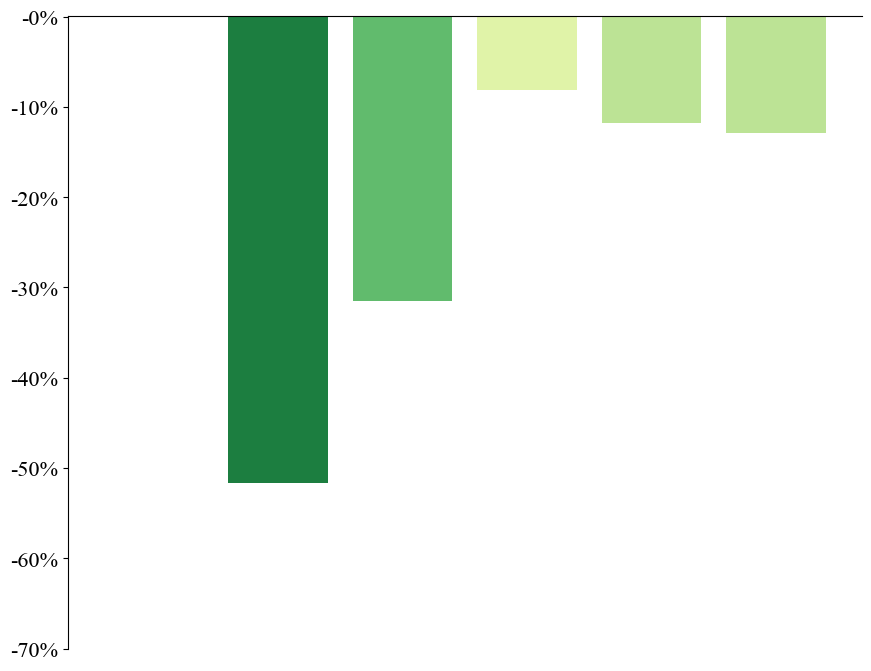

In [50]:
plot_compression_factors(flores_unseen_morfs_all_rw, flores_unseen_bytes, "compression_unseen", language_ordering=languages_unseen_ordering, languages=languages_unseen)

In [51]:
## Table with parity length results

<Figure size 1200x700 with 0 Axes>

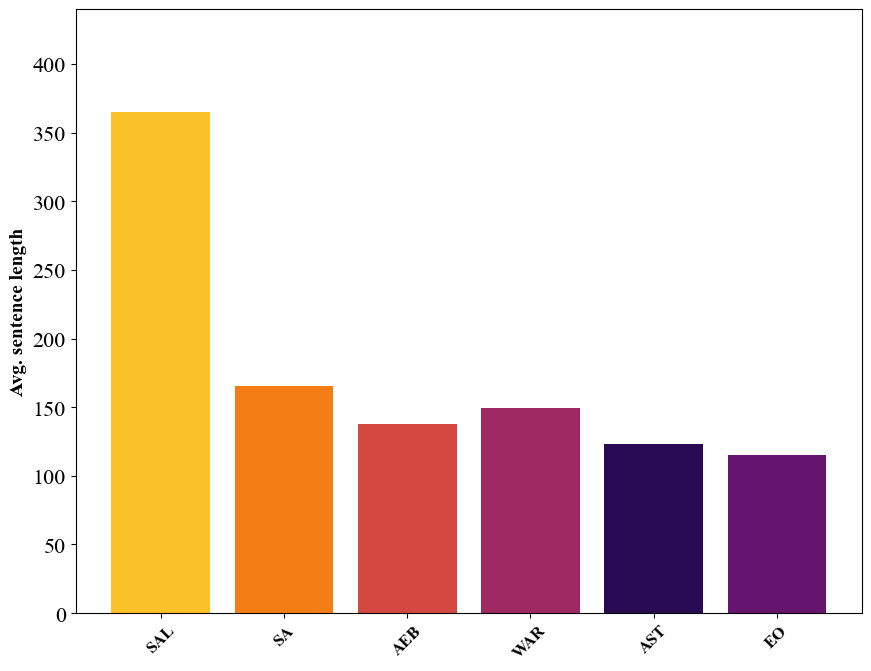

Log min diff: 2.0309166479751504
Log mean diff: 0.5221009648469099


In [52]:
plot_token_numbers(flores_unseen_morfs_all_rw, "mbytes_unseen", 440., language_ordering=languages_unseen_ordering, languages_colors=languages_colors_unseen)
compute_log_diff(flores_unseen_morfs_all_rw)


[-0.00042511135480549633, 0.5167116462528545, 0.31481026588323147, 0.08151603569283783, 0.11817789627785602, 0.1294357793363341]


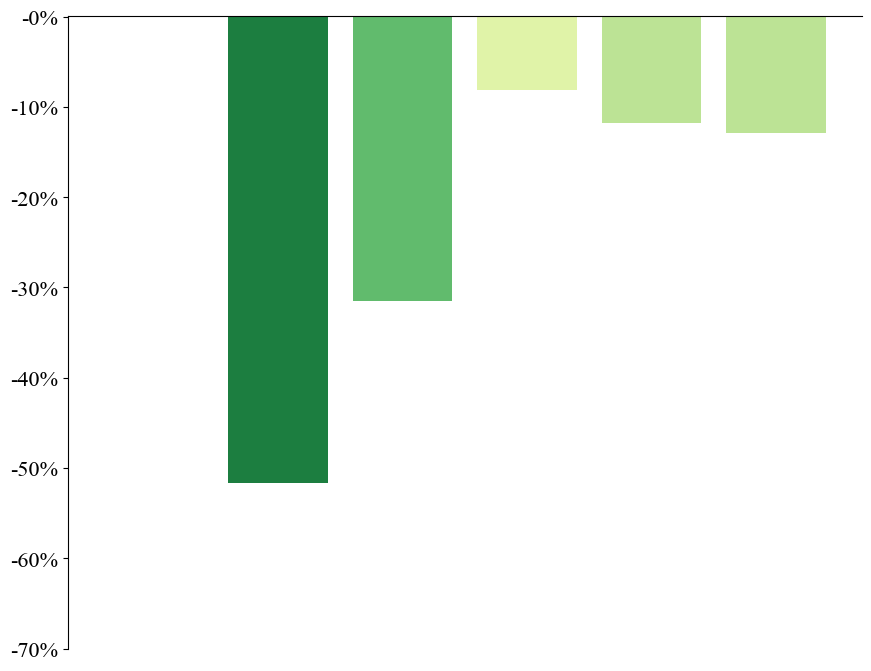

In [53]:
plot_compression_factors(flores_unseen_morfs_all_rw, flores_unseen_bytes, "compression_unseen", language_ordering=languages_unseen_ordering, languages=languages_unseen)

## Table with parity length results

In [54]:
def aggregate_results(lang_tokenized_methods, method_names, save_file=None):
    token_number_methods = {}
    for lang_tokenized, method in zip(lang_tokenized_methods, method_names):
        token_numbers = {}
        for lang in lang_tokenized.keys():
            token_numbers[lang] = sum(len(tokenized_line) for tokenized_line in lang_tokenized[lang]) / len(lang_tokenized[lang])
        token_number_methods[method] = token_numbers
    
    parity_df = pd.DataFrame(token_number_methods)
    en_values = parity_df.loc['en']
    for method in method_names:
        parity_df[(method, 'Parity')] = parity_df[method].div(en_values[method])
        parity_df[(method, 'Length')] = parity_df[method]
        
    parity_df.drop(method_names, axis=1, inplace=True)
    parity_df.columns = pd.MultiIndex.from_tuples(parity_df.columns)
    parity_df["Compression"] = 1. - (parity_df[(method_names[1], "Length")] / parity_df[(method_names[0], "Length")])
    
    parity_df['group'] = parity_df.index.map(lambda l: language_groups[l])
    parity_df['coarse group'] = parity_df.index.map(lambda l: language_groups_coarse[l])
    
    en_avg = parity_df.drop(["group", "coarse group"], axis=1).loc[["en"], :]
    granular_avg = parity_df.drop("coarse group", axis=1).groupby('group').mean()
    coarse_avg = parity_df.drop("group", axis=1).groupby("coarse group").mean()
    
    df_avg = pd.concat([en_avg, granular_avg, coarse_avg])
    if save_file:
        df_avg.to_latex(f"output/{save_file}.tex", float_format="%.2f", label=save_file)
    print(df_avg)

In [55]:
flores_bytes.update(flores_unseen_bytes)
flores_morfs_all_rw.update(flores_unseen_morfs_all_rw)
lang_tokenized_methods = [flores_bytes, flores_morfs_all_rw]
method_names = ["Byte", "Myte"]

aggregate_results(lang_tokenized_methods, method_names, "aggregated_parities")

# token_number_methods = {}
# for lang_tokenized, method in zip(lang_tokenized_methods, method_names):
#     token_numbers = {}
#     for lang in lang_tokenized.keys():
#         token_numbers[lang] = sum(len(tokenized_line) for tokenized_line in lang_tokenized[lang]) / len(lang_tokenized[lang])
#     token_number_methods[method] = token_numbers

# parity_df = pd.DataFrame(token_number_methods)
# # if parity and parity in toke|n_number_methods.index:
#     token_number_methods = token_number_methods / token_number_methods.loc["en",:]

# [ flores_morfs_all_rw,flores_bytes, flores_utf32, flores_mt5],
#                            ['Myte','Byte','Chara|cters','Subword Tokens']


                   Byte                  Myte             Compression
                 Parity      Length    Parity      Length            
en             1.000000  130.529644  1.000000  109.140316    0.163866
Latin HR       1.141255  148.967577  1.179147  128.692502    0.138103
Latin LR       1.123484  146.648024  1.176040  128.353384    0.124347
Non-Latin HR   1.623755  211.948123  1.293937  141.220726    0.285958
Non-Latin LR   2.333881  304.640635  1.328472  144.989864    0.498959
Unseen Lang    1.499458  195.723715  1.266847  138.264032    0.232130
Unseen Script  2.795808  364.935771  3.345152  365.090909   -0.000425
Seen           1.563577  204.093125  1.236233  134.922810    0.262515
Unseen         1.715516  223.925725  1.613231  176.068511    0.193371


/var/folders/9n/nnn8h5vs5sg4nqlp3t2w_q480000gn/T/ipykernel_16591/4260318087.py:28: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df_avg.to_latex(f"output/{save_file}.tex", float_format="%.2f", label=save_file)


In [56]:
8 * (64 + 64**2 + 64**3)


2130432